# Moon deconvolution

- Description.


 * integrand(k,r,a,sigma): Define the integrand for the Hankel transformation of the zeroth mode.
 * int_bessel(r,a,sigma) : Integrate the integrand (above function). This integration is in Fourier space to produce an array with domain in real space(2-sphere).
 * integral_bessel(r_array, a, sigma):


min 0.44747997342969054


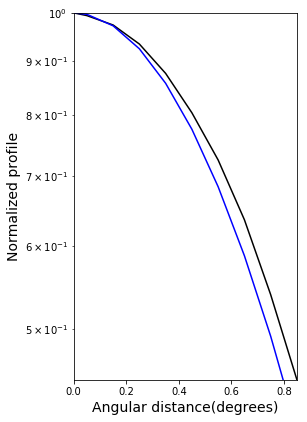

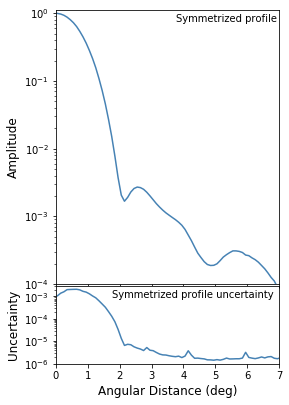

In [2]:
import numpy as np
from scipy.special import j0
from scipy.special import j1
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
from scipy.special import hermite
from mpmath import *
from scipy.special import *
from scipy.integrate import quad
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
import pickle
################################################################
######################   Loading data  #########################
################################################################
beam_map    = pickle.load(open("radial_profile.p","rb"))
profile     = beam_map['amplitude']
profile_err = beam_map['standard_error']
radius      = beam_map['radius']

profile     = np.append([1], profile)
profile_err = np.append([0], profile_err)
radius      = np.append([0], radius)
################################################################
#################### Fitting the main lobe #####################
################################################################
N_r_max   = 10                                          
B_profile = profile[:N_r_max]
B_error   = profile_err[:N_r_max]
theta_r   = radius[:N_r_max]

print'min', np.min(B_profile)

sigma = 0.63
figure = plt.figure()
plt.plot(theta_r[:N_r_max], B_profile[:N_r_max],'k')
plt.plot(theta_r, np.exp(-0.5*(sigma**-2.0)*(theta_r**2.0)),'b')
plt.yscale('Log')
plt.ylim([np.min(B_profile), 10**0])
plt.xlim([0, theta_r[theta_r.shape[0]-1]])
plt.xlabel('Angular distance(degrees)', size =14.0)
plt.ylabel('Normalized profile', size =14.0)
f = plt.gcf()
f.set_size_inches(4.0,6.75)
plt.show()
plt.clf()
###############################################################
###############################################################
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':[3.5, 1]})

ax1.plot(radius, profile ,'steelblue', label = 'Symmetrized profile')
#ax1.set_xlabel('$Angular Distance(Degrees)$', size= 12)
ax1.set_ylabel('Amplitude', size= 12) 
ax1.set_yscale('Log')
ax1.set_ylim([1*10**-4, 1.1])
ax1.set_xlim([0, 7.0])

ax2.plot(radius, profile_err,'steelblue',label = 'Symmetrized profile error' )
ax2.set_ylabel('Uncertainty', size= 12) 
ax2.set_xlim([0, 7.0])
ax2.set_ylim([1*10**-6, 3*10**-3])
ax2.set_yscale('Log')
ax2.set_xlabel('Angular Distance (deg)', size= 12)

ax1.annotate("Symmetrized profile", xy=(0.54, 0.96), xycoords="axes fraction")
ax2.annotate("Symmetrized profile uncertainty", xy=(0.25, 0.85), xycoords="axes fraction")

f.subplots_adjust(hspace = 0.01)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(4.0,6.5)

plt.savefig("/home/bastian/plots/simmetrized_profile_and_errors.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/simmetrized_profile_and_errors.png", bbox_inches="tight")

plt.show()
###############################################################
###############################################################

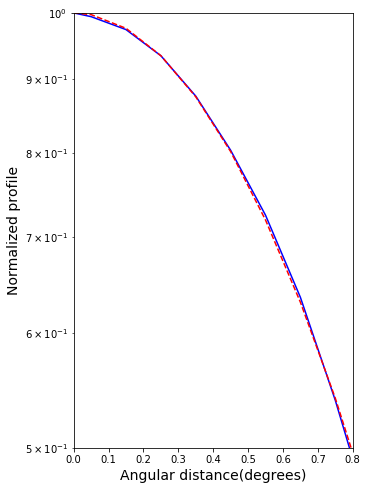

()
r_moon = 0.2499999999433047
sigma  = 0.6648926978971176


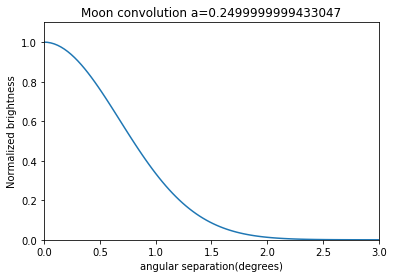

number_hermite_polynomials= 58.6316168202


In [5]:
####################################################################
#                       Main lobe fitting
####################################################################
def int_bessel(r,a,sigma):
    return quad(integrand, 0, np.inf, args=(r,a,sigma))[0]  
####################################################################
def integral_bessel(r_array, a, sigma):
    T_0 = int_bessel(0,a,sigma)    
    T   = np.zeros(r_array.shape[0])
    for i, r in enumerate(r_array):
        T[i] = int_bessel(r, a, sigma)/T_0    
    return T
##############################################################
def fit_main_lobe(bol, theta_r, B_profile, a, sigma, n):        
    if bol == True:    
        bounds = ([a-0.00000001,sigma-0.2], [a, sigma + 0.2])        
        popt_beam_sigma, pcov_beam = curve_fit(integral_bessel, theta_r[:n], B_profile[:n], bounds = bounds)
        f = plt.figure()
        plt.plot(theta_r[:n], B_profile[:n],'b-', label = 'moon' )
        plt.plot(theta_r[:n], integral_bessel(theta_r[:n],*popt_beam_sigma),'--r',label ='fit' )
        plt.xlabel('Angular distance(degrees)', size =14.0)
        plt.ylabel('Normalized profile', size = 14.0)
        plt.yscale('Log')
        plt.ylim([ 5*10**-1, 10**0])
        plt.xlim([0, 0.8])
        plt.savefig("/home/bastian/plots/Moon_beam_main_lobe.pdf", bbox_inches="tight")
        plt.savefig("/home/bastian/plots/Moon_beam_main_lobe.png", bbox_inches="tight")
        f = plt.gcf()
        f.set_size_inches(5.0,8.0)
        plt.show()       
        np.savetxt('popt_beam_sigma.txt', popt_beam_sigma, fmt='%s')
    else:
        popt_beam_sigma = np.loadtxt('popt_beam_sigma.txt', dtype = float)
                        
    return   popt_beam_sigma
################################################################
################################################################
################################################################
N_r_max   = 10                                          
B_profile = profile[:N_r_max]
B_error   = profile_err[:N_r_max]
theta_r   = radius[:N_r_max]

a         = 0.25
sigma     = 0.6301355           #Guess
radii     = np.linspace(0,3,100, dtype = float) 

# Sigma fit and plot 

a, sigma = fit_main_lobe(True, theta_r, B_profile, 0.25, 0.63, 16)

print sigma.shape
print 'r_moon = %s' %str(a)
print 'sigma  = %s' %str(sigma)

Sigma = np.zeros([1], dtype = float)
Sigma[0] = sigma

np.savetxt('sigma.txt', Sigma, fmt='%s')
sigma = np.loadtxt('sigma.txt', dtype = float)

########################## Plotting ################################
#### The convolution between a unitary disc and a gaussian beam ####
####################################################################
# Gaussian_sigma_fit or second moment fit
plt.clf()
plt.figure() 
plt.plot(radii, integral_bessel(radii, a, sigma)) 
plt.xlim([0,3])
plt.ylim([0,1.1])
plt.xlabel('angular separation(degrees)')
plt.ylabel('Normalized brightness')
plt.title('Moon convolution %s' %'a=' + str(a) )

plt.show()
####################################################################
####################################################################
print "number_hermite_polynomials=", ((7.2/0.664892697897)**2)/2
####################################################################
####################################################################


# 


-  integrand(k,r,a,sigma): $aj_{0}(kr) j_{1}(ka)(2 \pi \sigma^2)\exp(-\frac{1}{2}\sigma^2 k^2)$.

-  integrand_hankel(r,k,i,sigma): $ j_{0}(kr)r H_{2i}(\frac{r}{\sigma_{b}})\exp\left(-\frac{1}{2} \frac{r}{\sigma_{b}}\right)  $.

-  hankel_transform(k,i,sigma): $ \int dk j_{0}(kr)r H_{2i}(\frac{r}{\sigma_{b}})\exp\left(-\frac{1}{2} \frac{r}{\sigma_{b}}\right)  $

-  integrand_T_r_2h(k,r,h,a,sigma): $ aj_{0}(kr)j_{1}(ka)F_{1}(h+1,1,-\frac{\sigma^{2}k^{2}}{2})$.

-  integrand_T_0_2h(k,h,a,sigma): $aj_{1}(ka)F_{1}(h+1,1,-\frac{\sigma^{2}k^{2}}{2}) $.

-  int_T_r_2h(r_array,h,a,sigma): $\int dk aj_{0}(kr)j_{1}(ka)F_{1}(h+1,1,-\frac{\sigma^{2}k^{2}}{2})$

-  int_T_0_2h(i,a,sigma): $ \int dk aj_{1}(ka)F_{1}(h+1,1,-\frac{\sigma^{2}k^{2}}{2}) $



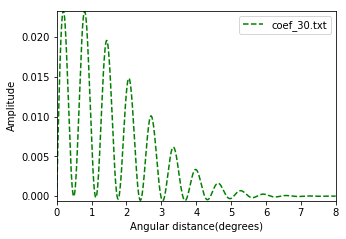

In [110]:
################################################
############ Basis transformation ##############
################################################
def integrand(k,r,a,sigma):
    return  a*j0(k*r)*j1(k*a)*(2*np.pi*sigma**2)*np.exp(-(0.5)*(sigma**2)*(k**2))
###################################################################
def integrand_hankel(r,k,h,sigma):
    return  j0(k*r)*r*(hermite(2*h)(r/sigma))*np.exp(-(0.5)*((r**2)/(sigma**2)))
###################################################################
def hankel_transform(k,h,sigma):
# Parameters are k, h, sigma.
    return quad(integrand_hankel, 0, np.inf, args=(k,h,sigma))[0] 
###################################################################
###################################################################
def pol_trans(k,h,sigma): 
    return (2**h)*(sigma**2)*gamma(h+1)*hyp1f1(h+1, 1,-(sigma*sigma)*(k*k)/2)
###############################################################
def integrand_T_r_2h(k,r,h,a,sigma):
     return 2*np.pi*a*j0(k*r)*j1(k*a)*hyp1f1(h+1,1,-(sigma*sigma)*(k*k)/2)   #basis_recons(k,i,sigma) 
################################################################    
def integrand_T_0_2h(k,h,a,sigma):
     return 2*np.pi*a*j1(k*a)*hyp1f1(h+1,1,-(sigma*sigma)*(k*k)/2)           #basis_recons(k,i,sigma)       
################################################################   
def int_T_r_2h(r_array,h,a,sigma):  
    I = np.zeros(r_array.shape[0])
    for j, radius in enumerate(r_array):
        I[j] = quad(integrand_T_r_2h, 0, np.inf, args=(radius, h, a, sigma), epsabs = 1.49e-14,epsrel = 1.49e-14 , limit = 120)[0]    
    return I
################################################################
def int_T_0_2h(h,a,sigma):                    
    return quad(integrand_T_0_2h, 0, np.inf, args=(h, a, sigma), epsabs = 1.49e-14, epsrel = 1.49e-14,limit = 120)[0] 
################################################################
def T_r_2h_modes(bol,theta_r,h,a,sigma): 
    if bol == True:       
        T_r_2h = np.zeros([h + 1, theta_r.shape[0]], dtype = float)
        for n in range(0, h + 1):
            T_r_2h[n,:] = int_T_r_2h(theta_r,n,a,sigma)*((2**n)*(sigma*sigma)*gamma(n+1))                                
        np.savetxt('T_r_2h.txt', T_r_2h, fmt='%s')        
    else: 
        T_r_2h = np.loadtxt('T_r_2h.txt', dtype = float)    
    return T_r_2h
################################################################
def T_0_2h_modes(bol,theta_r,h,a,sigma): 
    if bol == True:       
        T_0_2h = np.zeros(h + 1, dtype = float)
        for n in range(0, h + 1):                    
            T_0_2h[n]   = int_T_0_2h(n, a, sigma)*((2**n)*(sigma*sigma)*gamma(n+1))             
        np.savetxt('T_0_2h.txt', T_0_2h, fmt='%s')         
    else: 
        T_0_2h = np.loadtxt('T_0_2h.txt', dtype = float)     
    return T_0_2h
################################################################
def T_r_2i_modes(theta_r,i,a,sigma): 
    # Reconstruct a hermite polynomial of degree 2n (n index)
    T_r_2h  = np.loadtxt('T_r_2h.txt', dtype = float) 
    coef    = hermite(2*i).c   
    s       = coef.shape[0]
    T_r_2i  = 0.0
    for n in range(0,s):
        if n % 2 == 0:
            T_r_2i  = T_r_2i + coef[s-1-n]*T_r_2h[n/2,:]  
        else:
            T_r_2i  = T_r_2i + 0.0  
    T_r_2i = T_r_2i/np.sqrt((2**(2*i))*gamma(2*i+1)*(np.pi**0.5)*sigma)    
    return  T_r_2i
################################################################
def T_0_2i_modes(theta_r,i,a,sigma): 
    # Reconstruct a hermite polynomial of degree 2n (n index)
    T_0_2h  = np.loadtxt('T_0_2h.txt', dtype = float) 
    coef    = hermite(2*i).c   
    s       = coef.shape[0]
    T_0_2i  = 0.0
    for n in range(0,s):
        if n % 2 == 0: 
            T_0_2i  = T_0_2i + coef[s-1-n]*T_0_2h[n/2] #,:theta_r[theta_r.shape[0]-1]]
        else: 
            T_0_2i  = T_0_2i + 0.0 
    T_0_2i = T_0_2i/np.sqrt((2**(2*i))*gamma(2*i+1)*(np.pi**0.5)*sigma)       
    return  T_0_2i
################################################################
def T_r_matrix(theta_r, N_herm_cut, a, sigma):
    T_r = np.zeros([N_herm_cut + 1, theta_r.shape[0]], dtype = float)
    # print 'T_r', T_r.shape
    for i in range(0, N_herm_cut + 1):
        T_r[i,:] = T_r_2i_modes(theta_r, i, a, sigma)
    np.savetxt('T_r.txt', T_r, fmt='%s')
    return T_r
################################################################
def T_0_matrix(theta_r, N_herm_cut, a, sigma):
    T_0 = np.zeros(N_herm_cut + 1, dtype = float)
    # print'T_0', T_0.shape
    for i in range(0, N_herm_cut + 1):
        T_0[i]   = T_0_2i_modes(theta_r, i, a, sigma)        
    np.savetxt('T_0.txt', T_0, fmt='%s')
    return T_0 
################################################################
def T_r_cutting(N_max,ti,tf):
    T_r_cut = np.loadtxt('T_r.txt', dtype = float)[:N_max + 1,ti:tf]
    T_0_cut = np.loadtxt('T_0.txt', dtype = float)[:N_max + 1]
    np.savetxt('T_r_cut.txt', T_r_cut, fmt='%s')
    np.savetxt('T_0_cut.txt', T_0_cut, fmt='%s')
    return T_r_cut, T_0_cut 
################################################################
k      = np.linspace(0,8,1000)
h      = 26
sigma  = 0.664892697897
a      = 0.25
r = 5.0

hyper = integrand_T_r_2h(k,r,h,a,sigma)

plt.clf()
plt.figure()

l3 = plt.plot(k,hyper,'--g', label = name)

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
#plt.yscale('Log')
plt.xlim([0, k[k.shape[0]-1]])
plt.ylim([np.min(hyper), np.max(hyper)])
#plt.title('Hermite functions' )

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()

size_T_r_M1(param,point_in_r) (31, 70)
size_T_0_M1(param,point_in_r) (31,)
radius.shape (70,)
T_r (70,)


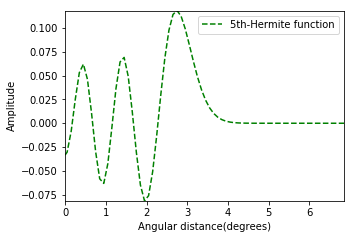

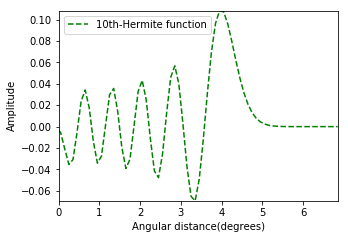

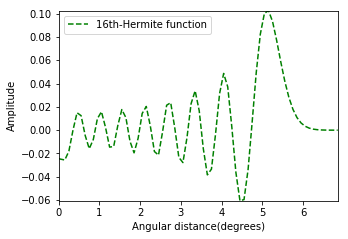

rad_beam.shape ()


IndexError: tuple index out of range

In [48]:
###############################################################
N_max = 30
N_r_max_fit  = 70

T_r = np.loadtxt('T_r.txt', dtype = float)[:N_max + 1,:N_r_max_fit]
T_0 = np.loadtxt('T_0.txt', dtype = float)[:N_max + 1]

print"size_T_r_M1(param,point_in_r)", T_r.shape
print"size_T_0_M1(param,point_in_r)", T_0.shape

beam_map    = pickle.load(open("radial_profile.p","rb"))

radius      = beam_map['radius']
radius      = np.append([0], radius)

radius = radius[:N_r_max_fit]

print"radius.shape", radius.shape
print"T_r", radius.shape
###############################################################
plt.clf()
plt.figure()
n5 = 5

name = '%sth-Hermite function' % str(n5)

l3 = plt.plot(radius, T_r[n5,:],'--g', label = name)

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
#plt.yscale('Log')
plt.xlim([0, radius[radius.shape[0]-1]])
plt.ylim([np.min(T_r[n5,:]), np.max(T_r[n5,:])])
#plt.title('Hermite functions' )

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()

###############################################################

plt.clf()
plt.figure()
n10 = 10

name = '%sth-Hermite function' % str(n10)

l3 = plt.plot(radius, T_r[n10,:],'--g', label = name)

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
#plt.yscale('Log')
plt.xlim([0, radius[radius.shape[0]-1]])
plt.ylim([np.min(T_r[n10,:]), np.max(T_r[n10,:])])
#plt.title('Hermite functions' )

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()
###############################################################

plt.clf()
plt.figure()
n16 = 16

name = '%sth-Hermite function' % str(n16)

l3 = plt.plot(radius, T_r[n16,:],'--g', label = name)

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
#plt.yscale('Log')
plt.xlim([0, radius[radius.shape[0]-1]])
plt.ylim([np.min(T_r[n16,:]), np.max(T_r[n16,:])])
#plt.title('Hermite functions' )

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()

###############################################################
plt.clf()
plt.figure()

n20 = 20

#print 'num_conv', T_r_num[0,:]

name = '%sth-Hermite function' % str(n20)


print 'rad_beam.shape', rad_beam.shape
rad_beam  = rad_beam[rad_beam.shape[0]-3]


T_r_num_2 = T_r_num[0,:]  

print 'T_r_num_2', T_r_num_2.shape

#T_r_num_2 = T_r_num_2[rad_beam.shape[0]-3]


#l3 = plt.plot(radius, T_r[n20,:]/(np.max(T_r[n20,:])),'--g', label = name)
l4 = plt.plot(rad_beam, T_r_num_2/np.max(T_r_num_2),'--r', label = "num_conv")

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
#plt.yscale('Log')
plt.xlim([0, radius[radius.shape[0]-1]])
#plt.ylim([np.min(  T_r[n20,:]/(np.max(T_r[n20,:])) ), np.max(T_r[n20,:]/(np.max(T_r[n20,:])))])
#plt.title('Hermite functions' )

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()

###############################################################


# 22 H.F. Fitting

sigma 0.664892697897
a 0.25
T_r (23, 58)
T_0 (23,)
index = 58 theta_array = 5.65
T_r_j (23, 57)
T_0_j (23, 57)
theta_r-shape 57
B_profile-shape 57
B_error-shape 57
[ 5.70500456e+00 -1.22649818e-01 -1.18065308e-01  2.96241454e-02
  1.80285158e-02  5.97410764e-03  5.60100017e-03 -7.09245960e-04
  8.54929097e-03 -5.27312992e-03  1.11761135e-02 -1.04369545e-02
  1.31919645e-02 -1.25806236e-02  1.28718925e-02 -1.02552259e-02
  9.76400570e-03 -6.06375514e-03  5.69548376e-03 -2.36909310e-03
  2.68476655e-03 -6.14498395e-04  7.18719097e-04]
coef [ 1.07583604e+00 -2.31290078e-02 -2.22644718e-02  5.58645009e-03
  3.39977415e-03  1.12658285e-03  1.05622314e-03 -1.33747897e-04
  1.61220473e-03 -9.94394159e-04  2.10756460e-03 -1.96817579e-03
  2.48770894e-03 -2.37242373e-03  2.42735054e-03 -1.93390584e-03
  1.84127271e-03 -1.14348836e-03  1.07404063e-03 -4.46757880e-04
  5.06286819e-04 -1.15880629e-04  1.35534319e-04]
cov [[ 8.91475411e-07 -1.35478874e-07 -2.05118053e-08  2.75112890e-08
   1.581526

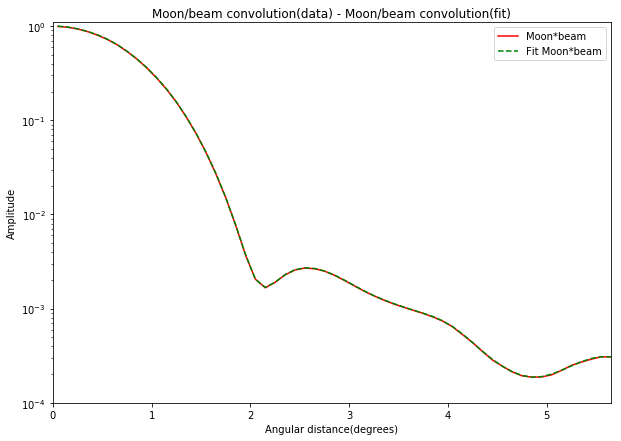

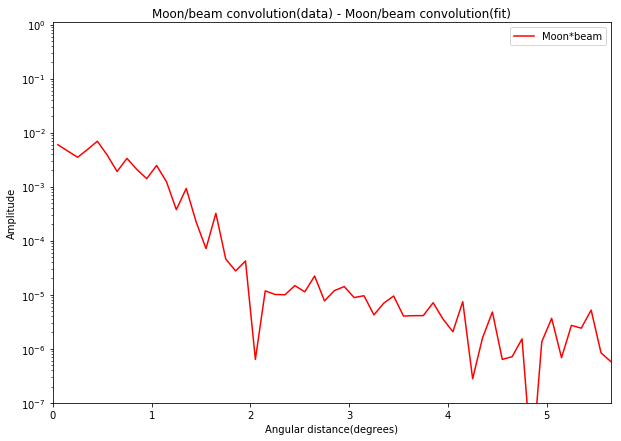

beam deconvolution comparison


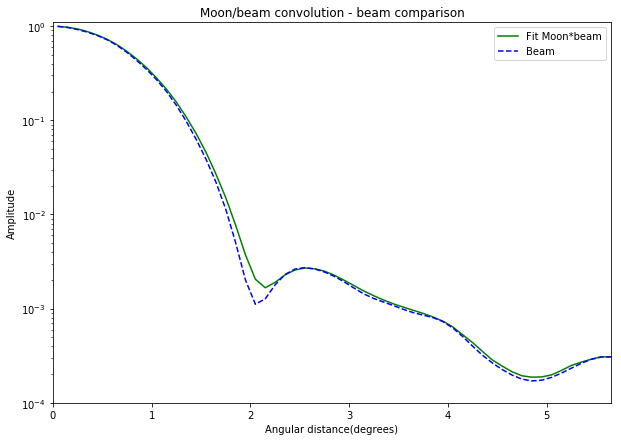

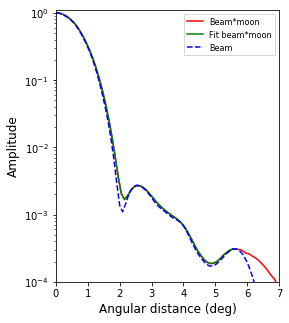

solid_angle 0.000792815379084


In [121]:
def normalized_map_22(r_array, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef    = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    T_r     = np.zeros([1, r_array.shape[0]], dtype = float)
    T_0     = 0.0
    T_r_i   = np.loadtxt('T_r_cut.txt', dtype = float)
    T_0_i   = np.loadtxt('T_0_cut.txt', dtype = float)
    for i in range(0, coef.shape[0]):
               T_r = T_r + coef[i]*T_r_i[i,:]
               T_0 = T_0 + coef[i]*T_0_i[i]                
    T_r = T_r
    T_r = T_r.reshape([r_array.shape[0]]) 
    T_r = T_r
    return T_r
################################################################
def beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam = 0.0
    for n in range(0, coef.shape[0]):
        beam  = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
################################################################################################################
def norm_beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0

####
beam_map    = pickle.load(open("radial_profile.p","rb"))
profile     = beam_map['amplitude']
radius      = beam_map['radius']
profile_err = beam_map['standard_error']

#Add the zeroth term.
profile     = np.append([1], profile)
profile_err = np.append([0], profile_err)
radius      = np.append([0], radius)

Number = 22

print "sigma", sigma
print "a", a

####
if Number == 22: 
    run       = True
    N_herm_cut= 22      #polinomial of degree 2*N_cut
    N_r_max   = 58
    B_profile = profile[:N_r_max]
    B_error   = profile_err[:N_r_max]
    theta_r   = radius[:N_r_max] 

    sigma     = sigma
    a         = a

    T_r_2h    = T_r_2h_modes(run, theta_r, N_herm_cut, a, sigma)
    T_0_2h    = T_0_2h_modes(run, theta_r, N_herm_cut, a, sigma)

    T_r       = T_r_matrix(theta_r,N_herm_cut,a,sigma)
    T_0       = T_0_matrix(theta_r,N_herm_cut,a,sigma)

    print 'T_r', T_r.shape
    print 'T_0', T_0.shape

    #print 'index =', theta_r.shape[0]-1, 'theta_array =', theta_r[theta_r.shape[0]-1]
    print 'index =', N_r_max , 'theta_array =', theta_r[N_r_max-1]
    
    N_max       = 22                         
    N_r_max_fit = N_r_max

    ti = 1
    tf = N_r_max

    T_r_j , T_0_j = T_r_cutting(N_max, ti, tf)

    print'T_r_j', T_r_j.shape
    print'T_0_j', T_r_j.shape

    theta_r   = theta_r[ti :tf]
    B_profile = B_profile[ti :tf]
    B_error   = B_error[ti :tf]
   
    theta_r   = theta_r.reshape([theta_r.shape[0],])
    B_profile = B_profile.reshape([theta_r.shape[0],])
    B_error   = B_error.reshape([theta_r.shape[0],])

    print 'theta_r-shape', theta_r.shape[0]
    print 'B_profile-shape', B_profile.shape[0]
    print 'B_error-shape', B_error.shape[0]
    
    ubound = np.array([1.06924527e+00, -2.39267050e-02, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])   
    lbound = np.array([1.06922527e+00, -2.39287050e-02, -1.0, -1.0, -1.0,-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0])   
   
    bounds = (lbound, ubound)
    guess32 = np.array([1.06923527e+00, -2.39277050e-02, -2.12230908e-02,  4.69911592e-03,
                        4.22252475e-03,  2.43276403e-04,  1.96932527e-03, -1.10843023e-03,
                        2.62377964e-03, -2.03530264e-03,  3.12998997e-03, -2.94131707e-03,
                        3.36894738e-03, -3.13652244e-03,  3.05565468e-03, -2.42654082e-03,
                        2.20293768e-03, -1.39512662e-03,  1.23311087e-03, -5.40457249e-04,
                        5.52432914e-04, -1.35252924e-04,  1.41131109e-04])
    
    #popt, pcov = curve_fit(normalized_map_22, theta_r, B_profile, p0 = guess32, sigma = B_error, bounds = bounds)#
    popt, pcov = curve_fit(normalized_map_22, theta_r, B_profile, p0 = guess32, sigma = B_error)#, absolute_sigma = True, bounds = bounds)#  
    
    print popt
    
    coef = popt/beam22(0.0,sigma,*popt) 
    cov  = pcov/(beam22(0.0,sigma,*popt)*beam22(0.0,sigma,*popt))
    
    np.savetxt('coef_22.txt', coef, fmt='%s')
    np.savetxt('cov_22.txt', cov, fmt='%s')
    
    print "coef", coef
    print "cov", cov

    t = normalized_map_22(theta_r,*coef)/normalized_map_22(theta_r,*coef)[0]  
    
    plt.clf()
    plt.figure()
    l1, = plt.plot(theta_r, B_profile,'r', label = 'Moon*beam')
    l2, = plt.plot(theta_r, t,'--g', label='Fit Moon*beam')

    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0, theta_r[theta_r.shape[0]-1]])
    plt.ylim([10**-4, 1.1])
    plt.title('Moon/beam convolution(data) - Moon/beam convolution(fit)' )

    plt.legend()
    f = plt.gcf()

    f.set_size_inches(10.0,7.0) 
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_22.pdf", bbox_inches="tight")
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_22.png", bbox_inches="tight")
    plt.show()

    diff = np.abs(B_profile-t)
    plt.clf()
    plt.figure()
    l1 = plt.plot(theta_r, diff,'r', label = 'Moon*beam')
    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0, theta_r[theta_r.shape[0]-1]])
    plt.ylim([10**-7, 1.1])
    plt.title('Moon/beam convolution(data) - Moon/beam convolution(fit)' )

    plt.legend()
    f = plt.gcf()

    f.set_size_inches(10.0,7.0) 
    #plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_22.pdf", bbox_inches="tight")
    #plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_22.png", bbox_inches="tight")
    plt.show()

    ######################################################
    print 'beam deconvolution comparison'

    plt.clf()
    plt.figure()

    l3, = plt.plot(theta_r, B_profile,'g-', label = 'Fit Moon*beam')
    l2, = plt.plot(theta_r, beam22(theta_r,sigma,*popt)/beam22(0.0,sigma,*popt),'--b', label='Beam')

    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0, theta_r[theta_r.shape[0]-1]])
    plt.ylim([10**-4, 1.1])
    plt.title('Moon/beam convolution - beam comparison')

    plt.legend()
    f = plt.gcf()
    f.set_size_inches(10.0,7.0) 
    plt.savefig("/home/bastian/plots/Moon_beam_deconvolution_beam_data-fit_M1_22.pdf", bbox_inches="tight")
    plt.savefig("/home/bastian/plots/Moon_beam_deconvolution_beam_data-fit_M1_22.png", bbox_inches="tight")
    plt.show()
    
name        ='coef_%s.txt' % str(Number)
coef        = np.loadtxt(name, dtype = float)

theta       = np.linspace(0, theta_r[N_r_max-2], 100, dtype = float) 
theta       = np.linspace(0, 9.0, 100, dtype = float) 
parameters  = np.loadtxt(name, dtype = float)   

profile     = np.append([1], profile)
radius      = np.append([0], radius)

B_profile   = normalized_map_22(theta_r,*coef)/normalized_map_22(theta_r,*coef)[0]  

############################################################################################
############################################################################################
plt.clf()
plt.figure()
l1, = plt.plot(radius, profile,'r', label = 'Beam*moon')
l2, = plt.plot(theta_r, B_profile,'g-', label = 'Fit beam*moon')
l3, = plt.plot(theta, norm_beam22(theta,sigma,*parameters),'--b', label = 'Beam')
plt.xlabel('Angular distance (deg)', size= 12)
plt.ylabel('Amplitude', size= 12)
plt.yscale('Log')
plt.xlim([0, 7])
plt.ylim([10**-4, 1.1])
#plt.title('Moon/beam convolution - beam comparison')

plt.legend(loc = 1, prop={'size': 8})

f = plt.gcf()
f.set_size_inches(4.0,5.0) 

plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.png", bbox_inches="tight")

plt.show()
############################################################################################
############################################################################################

import scipy.integrate as integrate

sigma_rad  = (2*np.pi/360.0)*sigma 
OMEGA = integrate.quad(lambda theta:2*np.pi*np.sin(theta)*norm_beam22(theta,sigma_rad,*parameters)\
                           ,0.0, np.pi, epsabs = 10**-8)[0]

print "solid_angle", OMEGA

sigma 0.664892697897
a 0.25
theta_r-shape 98
B_profile-shape 98
B_error-shape 98
[ 2.16936270e-02 -1.58044342e-04 -6.14295790e-04  2.09956518e-04
 -1.30475936e-05  9.99035602e-05 -5.24994431e-05  6.73765309e-05
 -3.53734141e-05  4.67014885e-05 -2.55471424e-05  3.13324917e-05
 -2.63071878e-05  3.51448259e-05 -4.10714195e-05  5.73408862e-05
 -6.35222375e-05  7.93249453e-05 -7.89856171e-05  8.71775795e-05
 -7.76790087e-05  7.68588135e-05 -6.33981310e-05  5.70504996e-05
 -4.25647670e-05  3.50743206e-05 -2.30617521e-05  1.67471201e-05
 -8.73024977e-06  4.66524973e-06 -1.15407234e-06]
coef [ 1.13084162e+00 -8.23850800e-03 -3.20219041e-02  1.09445769e-02
 -6.80142689e-04  5.20775541e-03 -2.73668184e-03  3.51219209e-03
 -1.84393918e-03  2.43444707e-03 -1.33171700e-03  1.63329468e-03
 -1.37133651e-03  1.83202337e-03 -2.14096381e-03  2.98905574e-03
 -3.31127615e-03  4.13503696e-03 -4.11734851e-03  4.54437771e-03
 -4.04923786e-03  4.00648287e-03 -3.30480675e-03  2.97391852e-03
 -2.21880878e-03  1

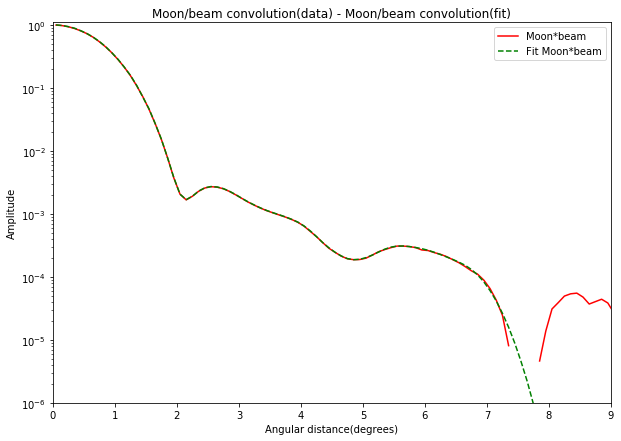

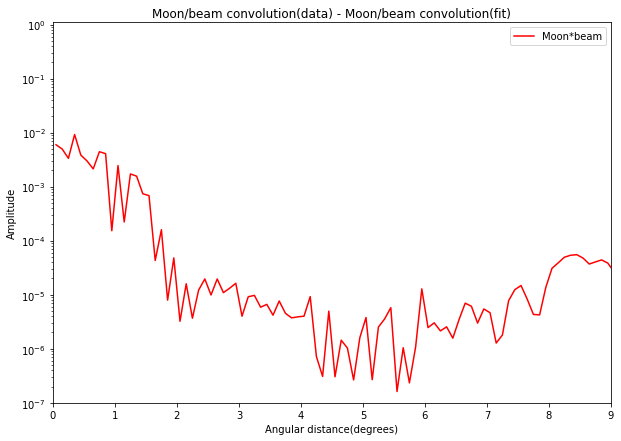

beam deconvolution comparison


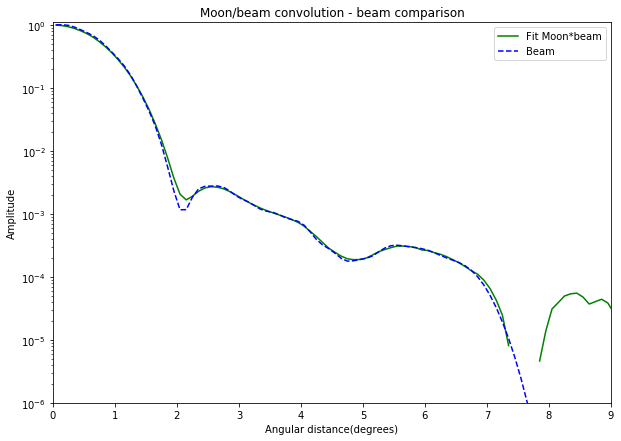

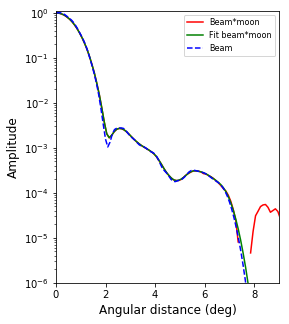

solid_angle 0.000852733672099


In [108]:
from scipy.interpolate import interp1d

def normalized_map_30(r_array, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30):
    coef    = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30])
    T_r     = np.zeros([1, r_array.shape[0]], dtype = float)
    #T_0     = 0.0
    T_r_i   = np.loadtxt('T_r_num_cut.txt', dtype = float)
    #T_0_i   = np.loadtxt('T_r_num_cut.txt', dtype = float)
    for i in range(0, coef.shape[0]):
               T_r = T_r + coef[i]*T_r_i[i,:]
               #T_0 = T_0 + coef[i]*T_0_i[i]                
    T_r = T_r
    T_r = T_r.reshape([r_array.shape[0]]) 
    T_r = T_r
    return T_r
################################################################
def beam30(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30])
    beam = 0.0
    for n in range(0, coef.shape[0]):
        beam  = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
################################################################################################################
def norm_beam30(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0
####################################################################################################################################
def T_r_cutting(N_max,ti,tf):
    T_r_cut = np.loadtxt('T_r_num.txt', dtype = float)[:N_max + 1,ti:tf]
    np.savetxt('T_r_num_cut.txt', T_r_cut, fmt='%s')
    return T_r_cut
####################################################################################################################################

beam_map    = pickle.load(open("radial_profile.p","rb"))
profile     = beam_map['amplitude']
radius      = beam_map['radius']
profile_err = beam_map['standard_error']

#Add the zeroth term.
profile     = np.append([1], profile)
profile_err = np.append([0], profile_err)
radius      = np.append([0], radius)

N_max = 30

N_points    = 500
M_distance  = 15


#T_r         = np.loadtxt('T_r.txt', dtype = float)[:N_max + 1,:N_r_max]
#T_r_num_0     = np.loadtxt('T_r_num.txt', dtype = float)[:,:N_points/2 - 3]#[:N_max + 1,:]
#rad_beam      = np.linspace(0, M_distance , N_points/2 - 3)


#T_r_num = np.zeros([N_max + 1, radius.shape[0]], dtype = float)   

#for i in range(0, N_max + 1):
#    interp_beam   = interp1d(rad_beam, T_r_num_0[i], kind = 'cubic')
#    T_r_num[i,:]  = interp_beam(radius)


#np.savetxt('T_r_num.txt', T_r_num, fmt = '%s')


#print "T_r_num", T_r_num.shape
#print "T_r_num", T_r_num
#print "rad_beam", rad_beam.shape


#plt.clf()
#plt.figure()
#l1, = plt.plot(radius, T_r_num_2,'r', label = 'Beam*moon')
#l2, = plt.plot(theta_r, B_profile,'g-', label = 'Fit beam*moon')
#l3, = plt.plot(theta, norm_beam22(theta,sigma,*parameters),'--b', label = 'Beam')
#plt.xlabel('Angular distance (deg)', size= 12)
#plt.ylabel('Amplitude', size= 12)
#plt.yscale('Log')
#plt.xlim([0, 7])
#plt.ylim([10**-4, 1.1])
#plt.title('Moon/beam convolution - beam comparison')

#plt.legend(loc = 1, prop={'size': 8})

#f = plt.gcf()
#f.set_size_inches(4.0,5.0) 

#plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.pdf", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.png", bbox_inches="tight")

#plt.show()



Number = 30

print "sigma", sigma
print "a", a

####
if Number == 30: 
    run       = True
    N_herm_cut= 30      #polinomial of degree 2*N_cut
    N_r_max   = 99
    B_profile = profile[:N_r_max]
    B_error   = profile_err[:N_r_max]
    theta_r   = radius[:N_r_max] 

    sigma     = sigma
    a         = a
   
    N_max       = 30                         
    N_r_max_fit = N_r_max

    ti = 1
    tf = N_r_max

    T_r_j = T_r_cutting(N_max, ti, tf)

    theta_r   = theta_r[ti :tf]
    B_profile = B_profile[ti :tf]
    B_error   = B_error[ti :tf]
   
    theta_r   = theta_r.reshape([theta_r.shape[0],])
    B_profile = B_profile.reshape([theta_r.shape[0],])
    B_error   = B_error.reshape([theta_r.shape[0],])

    print 'theta_r-shape', theta_r.shape[0]
    print 'B_profile-shape', B_profile.shape[0]
    print 'B_error-shape', B_error.shape[0]
    
    #ubound = np.array([1.06924527e+00, -2.39267050e-02, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])   
    #lbound = np.array([1.06922527e+00, -2.39287050e-02, -1.0, -1.0, -1.0,-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0])   
   
    #bounds = (lbound, ubound)
    guess32 = np.array([1.06923527e+00, -2.39277050e-02, -2.12230908e-02,  4.69911592e-03,
                        4.22252475e-03,  2.43276403e-04,  1.96932527e-03, -1.10843023e-03,
                        2.62377964e-03, -2.03530264e-03,  3.12998997e-03, -2.94131707e-03,
                        3.36894738e-03, -3.13652244e-03,  3.05565468e-03, -2.42654082e-03,
                        2.20293768e-03, -1.39512662e-03,  1.23311087e-03, -5.40457249e-04,
                        5.52432914e-04, -1.35252924e-04,  1.41131109e-04, 5.52432914e-04, 
                        -1.35252924e-04, 1.41131109e-04, 5.52432914e-04, -1.35252924e-04,
                        1.41131109e-04, 5.52432914e-04, -1.35252924e-04])
    
    #popt, pcov = curve_fit(normalized_map_22, theta_r, B_profile, p0 = guess32, sigma = B_error, bounds = bounds)#
    popt, pcov = curve_fit(normalized_map_30, theta_r, B_profile, p0 = guess32, sigma = B_error, absolute_sigma = True)#, bounds = bounds)# , 
    
    print popt
    
    coef = popt/beam30(0.0,sigma,*popt) 
    cov  = pcov/(beam30(0.0,sigma,*popt)*beam30(0.0,sigma,*popt))
    
    np.savetxt('coef_30.txt', coef, fmt='%s')
    np.savetxt('cov_30.txt', cov, fmt='%s')
    
    print "coef", coef
    print "cov", cov

    t = normalized_map_30(theta_r,*coef)/normalized_map_30(theta_r,*coef)[0]  
    
    plt.clf()
    plt.figure()
    l1, = plt.plot(theta_r, B_profile,'r', label = 'Moon*beam')
    l2, = plt.plot(theta_r, t,'--g', label='Fit Moon*beam')

    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0,9])
    plt.ylim([10**-6, 1.1])
    plt.title('Moon/beam convolution(data) - Moon/beam convolution(fit)' )

    plt.legend()
    f = plt.gcf()

    f.set_size_inches(10.0,7.0) 
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_30.pdf", bbox_inches="tight")
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_30.png", bbox_inches="tight")
    plt.show()

    diff = np.abs(B_profile-t)
    plt.clf()
    plt.figure()
    l1 = plt.plot(theta_r, diff,'r', label = 'Moon*beam')
    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0,9])
    plt.ylim([10**-7, 1.1])
    plt.title('Moon/beam convolution(data) - Moon/beam convolution(fit)' )

    plt.legend()
    f = plt.gcf()

    f.set_size_inches(10.0,7.0) 
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_30(diff).pdf", bbox_inches="tight")
    plt.savefig("/home/bastian/plots/Moon_beam_convolution_beam_data-fit_M1_30(diff).png", bbox_inches="tight")
    plt.show()

    ######################################################
    print 'beam deconvolution comparison'

    plt.clf()
    plt.figure()

    l3, = plt.plot(theta_r, B_profile,'g-', label = 'Fit Moon*beam')
    l2, = plt.plot(theta_r, beam30(theta_r,sigma,*popt)/beam30(0.0,sigma,*popt),'--b', label='Beam')

    plt.xlabel('Angular distance(degrees)')
    plt.ylabel('Amplitude')
    plt.yscale('Log')
    plt.xlim([0, 9])
    plt.ylim([10**-6, 1.1])
    plt.title('Moon/beam convolution - beam comparison')

    plt.legend()
    f = plt.gcf()
    f.set_size_inches(10.0,7.0) 
    plt.savefig("/home/bastian/plots/Moon_beam_deconvolution_beam_data-fit_M1_30.pdf", bbox_inches="tight")
    plt.savefig("/home/bastian/plots/Moon_beam_deconvolution_beam_data-fit_M1_30.png", bbox_inches="tight")
    plt.show()
    
name        ='coef_%s.txt' % str(Number)
coef        = np.loadtxt(name, dtype = float)

theta       = np.linspace(0, theta_r[N_r_max-2], 100, dtype = float) 
theta       = np.linspace(0, 9.0, 100, dtype = float) 
parameters  = np.loadtxt(name, dtype = float)   

profile     = np.append([1], profile)
radius      = np.append([0], radius)

B_profile   = normalized_map_30(theta_r,*coef)/normalized_map_30(theta_r,*coef)[0]  

############################################################################################
############################################################################################
plt.clf()
plt.figure()
l1, = plt.plot(radius, profile,'r', label = 'Beam*moon')
l2, = plt.plot(theta_r, B_profile,'g-', label = 'Fit beam*moon')
l3, = plt.plot(theta, norm_beam30(theta,sigma,*parameters),'--b', label = 'Beam')
plt.xlabel('Angular distance (deg)', size= 12)
plt.ylabel('Amplitude', size= 12)
plt.yscale('Log')
plt.xlim([0, 9])
plt.ylim([10**-6, 1.1])
#plt.title('Moon/beam convolution - beam comparison')

plt.legend(loc = 1, prop={'size': 8})

f = plt.gcf()
f.set_size_inches(4.0,5.0) 

plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/simmetrized_profile_beam_moon_fit.png", bbox_inches="tight")

plt.show()
############################################################################################
############################################################################################

import scipy.integrate as integrate

sigma_rad  = (2*np.pi/360.0)*sigma 
OMEGA = integrate.quad(lambda theta:2*np.pi*np.sin(theta)*norm_beam30(theta,sigma_rad,*parameters)\
                           ,0.0, np.pi, epsabs = 10**-8)[0]

print "solid_angle", OMEGA



# Projection coefficients



In [197]:
#inner product
def T_r_matrix(theta_r, N_herm_cut, a, sigma):
    T_r = np.zeros([N_herm_cut + 1, theta_r.shape[0]], dtype = float)
    # print 'T_r', T_r.shape
    for i in range(0, N_herm_cut + 1):
        T_r[i,:] = T_r_2i_modes(theta_r, i, a, sigma)
    np.savetxt('T_r.txt', T_r, fmt='%s')
    return T_r    

def projection(theta_r, profile, coef):
    T_r = np.loadtxt('T_r.txt', dtype = float)[coef,:theta_r.shape[0]]
    integral = np.trapz(T_r*profile, theta_r)
    return integral
   
beam_map    = pickle.load(open("radial_profile.p","rb"))
profile     = beam_map['amplitude']
radius      = beam_map['radius']
profile_err = beam_map['standard_error']

#Add the zeroth term.
profile     = np.append([1], profile)
profile_err = np.append([0], profile_err)
radius      = np.append([0], radius)    
      
N_r_max   = 73 
B_profile = profile[:N_r_max]
B_error   = profile_err[:N_r_max]
theta_r   = radius[:N_r_max] 
    
a          = a
sigma      = sigma 
N_herm_cut = 22

run = True

T_r_2h    = T_r_2h_modes(run, theta_r, N_herm_cut, a, sigma)
T_0_2h    = T_0_2h_modes(run, theta_r, N_herm_cut, a, sigma)

T_r = T_r_matrix(theta_r, N_herm_cut, a, sigma)
    
coefficient = np.zeros(16, dtype=float) 

for n in range(0,16): 
    coefficient[n] = projection(theta_r, B_profile, n) 
    
print coefficient/coefficient[0]   
print coef/coef[0]
    

[ 1.          0.0971009  -0.07507631  0.06066197 -0.05956077  0.0650584
 -0.06204076  0.06344516 -0.06161122  0.06190254 -0.06009792  0.05976114
 -0.05815501  0.05728993 -0.05578576  0.05462943]
[  1.00000000e+00   1.90759014e-02  -2.08672312e-02  -5.01151703e-05
   5.16189123e-03   9.54780458e-04  -2.78098698e-04   4.24398488e-03
  -5.21769574e-03   7.28190815e-03  -6.25921347e-03   5.82242431e-03
  -3.83257307e-03   2.58045382e-03  -1.18731627e-03   5.13759441e-04]


# Numerical convolution

/etc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


time_elapsed(seconds) 71.277483
time_elapsed(minutes) 1.18795805


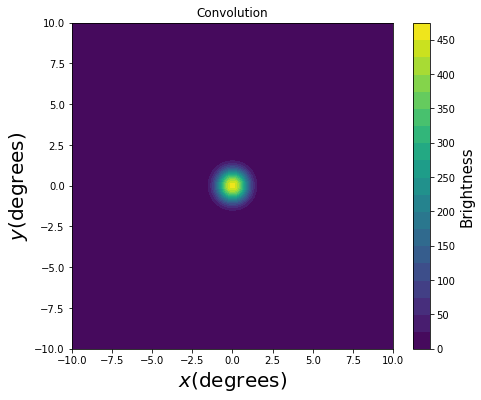

rad_beam.shape (499,)
rad_beam_last 10.0


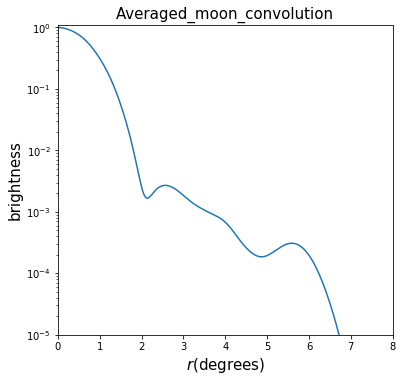

In [19]:
# Consistency test
# Compute the convolution between the moon and the fit beam.
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
import pickle
from matplotlib.mlab import griddata
import numpy.ma as ma
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.special import hermite

import time
time_start = time.clock()
################################################
def circle(x_array, y_array, radius):       
    moon = np.zeros([x_array.shape[0], y_array.shape[0]], dtype = float) 
    n_r  = moon.shape[0]
    #Density of points per angle.
    N    = moon.shape[0]/(2.0*np.amax(x_array))   
    r    = np.linspace(0, radius, N, dtype = float)   
    for k in range(0, r.shape[0]):       
        for i in range(-k + n_r/2, k + n_r/2 + 1):
            for j in range(-k + n_r/2, k + n_r/2 + 1):       
                if (x_array[i]**2 + y_array[j]**2 <= r[k]**2) : 
                    moon[i,j] = 1.0
    return moon
##################################################
#Get the radial profile from the convolution.
def av_circle_3(x_array, y_array, Z):
    n_r = Z.shape[0]  #(assuming that dimension is a even number)   
    r   = np.linspace(0, x_array[x_array.shape[0]-1], n_r/2 - 1, dtype = float)
    b_r = np.zeros(n_r/2 - 1, dtype = float)
    N_r = np.zeros(n_r/2 - 1, dtype = float)
    for k in range(0, r.shape[0] - 2): 
# Choose a k and do the following two index operation:        
        for i in range(-k + n_r/2, k + n_r/2 + 1):
            for j in range(-k + n_r/2, k + n_r/2 + 1):       
                if (x_array[i]**2 + y_array[j]**2 <= r[k+1]**2) and  (x_array[i]**2 + y_array[j]**2 > r[k]**2): 
                    N_r[k] = N_r[k] + 1.0
                    b_r[k] = b_r[k] + Z[i,j]
# Normalize for each k element:
    b_r = b_r/N_r
# Return the complete array:
    return r, b_r, N_r
##################################################
def beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam = 0.0
    for n in range(0, coef.shape[0]):
        beam  = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
################################################
################################################
# Parameters
Number      = 22
name        = 'coef_%s.txt' % str(Number)
parameters  = np.loadtxt(name, dtype = float)
sigma       = np.loadtxt('sigma.txt', dtype = float)    #degrees  #np.loadtext('sigma_det57.text',dtype = float)
a           = 0.25

N_points    = 1000
M_distance  = 10
# 2*10/1000 0.1 degrees contain 5 points
x           = np.linspace(-M_distance, M_distance, N_points)
y           = np.linspace(-M_distance, M_distance, N_points)

dx = (2*M_distance)/(N_points-1)
dy = dx

X, Y        = np.meshgrid(x, y)

Beam_kernel = beam22((X**2 + Y**2)**0.5, sigma, *parameters)/beam22(0.0, sigma, *parameters)
Beam_kernel = Beam_kernel #/np.sum(Beam_kernel)

moon = circle(x, y, a)
np.savetxt('moon.txt', moon, fmt = '%s')
moon = np.loadtxt('moon.txt', dtype = float)
#
moon_beam_convolution     = signal.convolve2d(moon, Beam_kernel, boundary = 'symm', mode = 'same')
np.savetxt('moon_beam_convolution.txt', moon_beam_convolution, fmt = '%s')
moon_beam_convolution     = np.loadtxt('moon_beam_convolution.txt', dtype=float)
moon_beam_convolution     = moon_beam_convolution*dx*dy

#time
time_elapsed = (time.clock() - time_start)
print 'time_elapsed(seconds)', time_elapsed
print 'time_elapsed(minutes)', time_elapsed/60.0
################################################################################
plt.clf()
plt.figure()
CM = plt.contourf(X, Y, moon_beam_convolution, 20)
plt.title('Convolution')
plt.xlabel('$x$(degrees)', fontsize=20)
plt.ylabel('$y$(degrees)', fontsize=20)
cbar = plt.colorbar(CM)
cbar.ax.set_ylabel('Brightness', fontsize=15)
f = plt.gcf()
f.set_size_inches(7.2,6.0)
plt.show()
################################################################################
#rad_beam , ave_rings_beam, Number_beam = av_circle_3(x, y, moon_beam_convolution)


print 'rad_beam.shape', rad_beam.shape
print 'rad_beam_last', rad_beam[rad_beam.shape[0]-1]

plt.clf()
plt.figure()
plt.plot(rad_beam, ave_rings_beam/ave_rings_beam[1])
plt.title('Averaged_moon_convolution',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('brightness',fontsize=15)
plt.xlim([0,8])
plt.yscale('Log')
plt.ylim([10**-5,10**0+0.1])
f = plt.gcf()
f.set_size_inches(6.0,5.7)
plt.show()
################################################################################

# Solid angle normalization
#gaussian_kernel = np.exp(-0.5*((sigma)**-2)*(X**2 + Y**2))
#gaussian_kernel = gaussian_kernel/np.sum(gaussian_kernel)

#moon_gaussian_convolution = signal.convolve2d(moon, gaussian_kernel, boundary = 'symm', mode = 'same')

#np.savetxt('moon_gaussian_convolution.txt',moon_gaussian_convolution, fmt='%s')
#moon_gaussian_convolution = np.loadtxt('moon_gaussian_convolution.txt', dtype=float)


#################################################################
#plt.clf()
#plt.figure()
#CM = plt.contourf(X, Y, moon_gaussian_convolution, 20)
#plt.title('Convolution')
#plt.xlabel('$x$(degrees)',fontsize=20)
#plt.ylabel('$y$(degrees)',fontsize=20)
#cbar = plt.colorbar(CM)
#cbar.ax.set_ylabel('Brightness',fontsize=15)
#f = plt.gcf()
#f.set_size_inches(7.2,6.0)
#plt.show()
#################################################################
#rad_g, ave_rings_g, Number_g = av_circle(x,y,moon_gaussian_convolution)


# Numerical basis convolution 

dx 0.0300601202405
X (500, 500)


/etc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


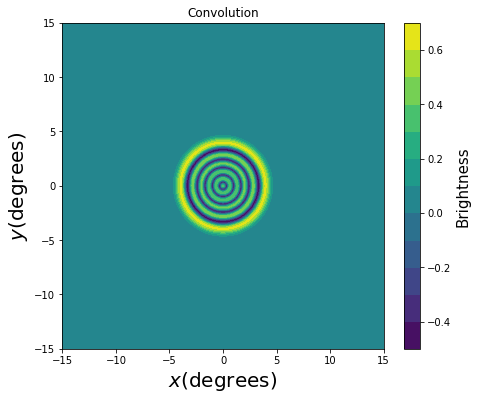

/etc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in divide


moon_beam_convolution 500
x 500
y 500


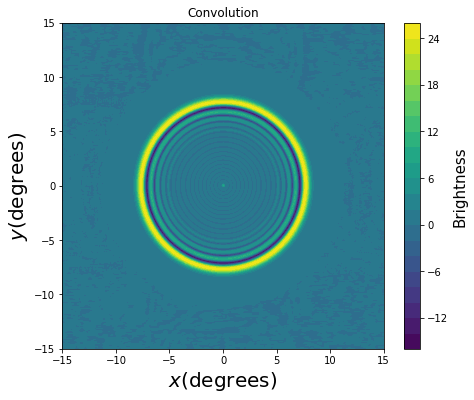

T_r_num [[ 4.63311904e+01  4.60574042e+01  4.53658201e+01 ... -2.86426415e-17
              nan             nan]
 [-2.84194343e+01 -2.75058155e+01 -2.52199421e+01 ...  5.99182040e-17
              nan             nan]
 [ 2.10723839e+01  1.97785790e+01  1.65933045e+01 ...  9.62447579e-18
              nan             nan]
 ...
 [ 9.06084744e+00  6.89277825e+00  2.99888261e+00 ... -1.22373194e-16
              nan             nan]
 [-8.97445054e+00 -6.70642569e+00 -2.72186399e+00 ... -1.35838502e-16
              nan             nan]
 [ 8.86672120e+00  6.50931133e+00  2.45684802e+00 ... -1.18966879e-16
              nan             nan]]
T_r_num nan
T_r 0.17462535832849863
ratio nan


ValueError: x and y must have same first dimension, but have shapes (247,) and (34, 249)

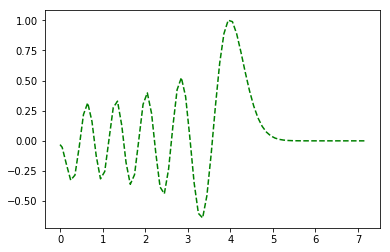

In [71]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
import pickle
from matplotlib.mlab import griddata
import numpy.ma as ma
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.special import hermite
################################################
def circle(x_array, y_array, radius):       
    moon = np.zeros([x_array.shape[0], y_array.shape[0]], dtype = float) 
    n_r  = moon.shape[0]
    #Density of points per angle.
    N    = moon.shape[0]/(2.0*np.amax(x_array))   
    r    = np.linspace(0, radius, N, dtype = float)   
    for k in range(0, r.shape[0]):       
        for i in range(-k + n_r/2, k + n_r/2 + 1):
            for j in range(-k + n_r/2, k + n_r/2 + 1):       
                if (x_array[i]**2 + y_array[j]**2 <= r[k]**2) : 
                    moon[i,j] = 1.0
    return moon
##################################################
def av_circle_3(x_array, y_array, Z):
    n_r = Z.shape[0]  #(assuming that dimension is a even number)   
    r   = np.linspace(0, x_array[x_array.shape[0]-1], n_r/2 - 1, dtype = float)
    b_r = np.zeros(n_r/2 - 1, dtype = float)
    N_r = np.zeros(n_r/2 - 1, dtype = float)
    for k in range(0, r.shape[0] - 2): 
# Choose a k and do the following two index operation:        
        for i in range(-k + n_r/2, k + n_r/2 + 1):
            for j in range(-k + n_r/2, k + n_r/2 + 1):       
                if (x_array[i]**2 + y_array[j]**2 <= r[k+1]**2) and (x_array[i]**2 + y_array[j]**2 > r[k]**2): 
                    N_r[k] = N_r[k] + 1.0
                    b_r[k] = b_r[k] + Z[i,j]
# Normalize for each k element:
    b_r = b_r/N_r
# Return the complete array:
    return r, b_r, N_r
##################################################
def beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam = 0.0
    for n in range(0, coef.shape[0]):
        beam  = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
##################################################
def hermite_2n(theta_array, sigma, n):
    return np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
################################################
# Parameters
Number      = 22
name        = 'coef_%s.txt' % str(Number)
parameters  = np.loadtxt(name, dtype = float)
sigma       = np.loadtxt('sigma.txt', dtype = float)    
a           = 0.25

hf          = 10

N_points    = 500
M_distance  = 15

dx = (2*M_distance)/(N_points-1)
dy = dx


print "dx", 15.0/(500-1)

x           = np.linspace(-M_distance, M_distance, N_points)
y           = np.linspace(-M_distance, M_distance, N_points)
X, Y        = np.meshgrid(x,y)

print "X", X.shape

moon        = circle(x, y, a)
np.savetxt('moon.txt', moon, fmt='%s')
moon        = np.loadtxt('moon.txt', dtype = float)
################################################## 
plt.clf()
plt.figure()
CM = plt.contourf(X, Y, hermite_2n((X**2 + Y**2)**0.5, sigma, hf), 10)
plt.title('Convolution')
plt.xlabel('$x$(degrees)', fontsize = 20)
plt.ylabel('$y$(degrees)', fontsize = 20)
cbar = plt.colorbar(CM)
cbar.ax.set_ylabel('Brightness', fontsize = 15)
f = plt.gcf()
f.set_size_inches(7.2,6.0)
plt.show()
################################################################################
################################################################################
# Whats in the numerical normalization for the hermie convolution
# In av_circle some outputs are redundant.
N_h_i, N_h_f = 0, 35

T_r_num = np.zeros([N_h_f + 1 - N_h_i, N_points/2 - 1], dtype = float)   
for n in range(N_h_i, N_h_f + 1):
    Beam_kernel              = hermite_2n((X**2 + Y**2)**0.5, sigma, n)
    #moon_beam_convolution    = signal.convolve2d(moon, Beam_kernel, boundary = 'symm', mode = 'same')
    moon_beam_convolution    = signal.fftconvolve(Beam_kernel, moon, mode = 'same')
    T_r_num[n - N_h_i,:]     = av_circle_3(x, y, moon_beam_convolution)[1] 
    
       
print "moon_beam_convolution", moon_beam_convolution.shape[0] 
print "x", x.shape[0] 
print "y", y.shape[0] 

moon_beam_convolution        = moon_beam_convolution    
    
np.savetxt('T_r_num.txt', T_r_num, fmt = '%s')

plt.clf()
plt.figure()
CM = plt.contourf(X, Y, moon_beam_convolution, 20)
plt.title('Convolution')
plt.xlabel('$x$(degrees)', fontsize = 20)
plt.ylabel('$y$(degrees)', fontsize = 20)
cbar = plt.colorbar(CM)
cbar.ax.set_ylabel('Brightness', fontsize = 15)
f = plt.gcf()
f.set_size_inches(7.2,6.0)
plt.show()
################################################################################
################################################################################
N_max       = 22      
N_r_max     = 73

T_r         = np.loadtxt('T_r.txt', dtype = float)[:N_max + 1,:N_r_max]
T_r_num     = np.loadtxt('T_r_num.txt', dtype = float)
T_r_num     = T_r_num[:T_r_num.shape[0]-2]
rad_beam    = np.linspace(0, M_distance , N_points/2 - 3)


print "T_r_num", T_r_num
print "T_r_num", np.amax(T_r_num) 
print "T_r", np.amax(T_r) 

print "ratio", np.amax(T_r)/np.amax(T_r_num) 

beam_map    = pickle.load(open("radial_profile.p","rb"))
radius      = beam_map['radius']
radius      = np.append([0], radius)
radius      = radius[:N_r_max]

plt.clf()
plt.figure()
n20 = hf

name1 = '%sth-Hermite function(ana)' % str(n20)
name2 = '%sth-Hermite function(num)' % str(n20)

l1 = plt.plot(radius, T_r[n20,:]/np.max(T_r[n20,:]),'--g', label = name1)
l2 = plt.plot(rad_beam, T_r_num/np.max(T_r_num), label = name2)

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')

plt.xlim([0, M_distance])
#plt.ylim([np.min(T_r[n20,:]/np.max(T_r[n20,:])), np.max(T_r[n20,:]/np.max(T_r[n20,:]))])

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5)
plt.show()
################################################################################
################################################################################

# N_points    = 250
# M_distance  = 10

# 15: T_r_num 16.549393062548745 T_r 0.17462535832849863 ratio 0.010551768132432335
# 10: T_r_num 17.501370466786547 T_r 0.17462535832849863 ratio 0.009977810518318904
# 5: T_r_num 19.004743477472466 T_r 0.17462535832849863 ratio 0.009188514358822742
# 3: T_r_num 20.171923246756215 T_r 0.17462535832849863 ratio 0.008656852209497653


# Fourier

# N_points    = 250
# M_distance  = 10

# hf = 10

# T_r_num 17.501370466786547
# T_r 0.17462535832849863
# ratio 0.009977810518318904

# hf = 15

#T_r_num 16.54939306254874
#T_r 0.17462535832849863
#ratio 0.010551768132432337


# hf = 20
#T_r_num 15.988936901964903
#T_r 0.17462535832849863
#ratio 0.010921636591550916




###################################
# N_points    = 500
# M_distance  = 15

# hf = 20
#T_r_num 26.484525042138078
#T_r 0.17462535832849863
#ratio 0.006593486500160444



# hf = 15
#T_r_num 28.75994238385581
#T_r 0.17462535832849863
#ratio 0.006071825735872243


# hf = 5
#T_r_num 31.277626974785807
#T_r 0.17462535832849863
#ratio 0.005583075674803315

#######


#N_points    = 500
#M_distance  = 15


#hf          = 0

#T_r_num 46.33119044341898
#T_r 0.17462535832849863
#ratio 0.003769066942964832


#hf          = 1
#T_r_num 37.145323444512016
#T_r 0.17462535832849863
#ratio 0.004701139797297913



#hf = 10


#T_r_num 28.75994238385581
#T_r 0.17462535832849863
#ratio 0.006071825735872243


#####

###


In [ ]:
## import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import fft
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate

#Domain and parameters
theta = np.linspace(0,10,1000, dtype=float)
sigma = (2*np.pi/360.0)*0.6301355
# Defining two functions:
#1  The basis vector function that goes inside the integrand.
def basis(theta_array,sigma,l,i):
    B_l_i =(legendre(l)(np.cos(theta_array)))*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*i)(theta/sigma))
    return B_l_i

#2 Define the integral.
def basis_trans(sigma,l,i):
    #(standard deviation, l multipole moment in (harmonic space), i index for the hermite expansion)
    # Usual domain of the multipole moment(0,100) 
    # Usual domain of the hermite term(0,23) 
    B_l_i   = integrate.quad(lambda x: 2*np.pi*np.sin(x)*(legendre(l)(np.cos(x)))*np.exp(-(x**2)/(2*sigma**2))*(hermite(2*i)(x/sigma)), 0, 1)
    return B_l_i

##### Computing the first 80 multipole moment for each vector 12 its good
l_max = 250
i_max = 12
#################################################
#################################################
#################################################
#  Don't erase.
B = np.zeros([l_max + 1, i_max + 1], dtype = float)
for l in range(0,l_max + 1):
    for i in range(0,i_max + 1):
         B[l,i] = basis_trans(sigma,l,i)[0]
############# Save the array #################### 
name = 'B_ell_T_i_%s.txt' % str(l_max)

np.savetxt(name, B, fmt='%s')
B = np.loadtxt(name, dtype=float)[0:l_max + 1, 0:i_max + 1]
# Computig the multipoles component of the beam response function.
coef      = np.loadtxt('parameters.txt', dtype=float)
pcov_beam = np.loadtxt('covariance.txt', dtype=float)

print B.shape
print coef.shape
print pcov_beam.shape
print pcov_beam

# Dot product between B_l_i and c_i to get the component
b_ell = np.dot(B,coef[:i_max + 1]).reshape((B.shape[0],1))
b_ell = b_ell
b_ell_solid_angle = b_ell[0]

print 'solid angle'
print  b_ell[0]

######Creating the domain in harmonic space. #####
l  = np.arange(0, l_max + 1, 1) 
###################################################
####################Plotting#######################
###################################################
# Beam 
f = plt.figure()
plt.plot(l,b_ell,'.')
plt.xlim([0, l_max + 1])
plt.xlabel('$l$', size =14.0)

plt.ylabel('$B_{l}$', size =14.0)
g = plt.gcf()
g.set_size_inches(6,4)
plt.show()
###################################################
####################Plotting#######################
###################################################

# Normalized beam.
f = plt.figure()
plt.plot(l, b_ell/b_ell[0])
plt.xlim([0, l_max])
plt.xlabel('$l$', size =14.0)
plt.ylabel('$b_{l}$', size =14.0)
g = plt.gcf()
g.set_size_inches(6,4)

f = plt.gcf()
f.set_size_inches(8.0,3.5)
plt.savefig("/home/bastian/plots/normalized_beam_response_function_beam.png", bbox_inches = "tight")

plt.show()
###################################################
###################################################
###################################################

# Manipulating the covariance matrix between different l's.
pcov_beam = pcov_beam[:i_max + 1,:i_max + 1]

print 'Covariance matrix of the fitting coefficients'
print pcov_beam.shape
print pcov_beam
print B.shape
print B

bt      = B.transpose()
Sigma_B = np.dot(B,np.dot(pcov_beam, bt))
print 'Sigma_B'
print Sigma_B.shape
print Sigma_B 
 
############print diag.shape###########
b_ell = b_ell.reshape([l_max,])
print 'b_ell'
print b_ell.shape 
print b_ell

###################################################
diag  =  np.diag(Sigma_B)
diag1 =  (diag**0.5)/b_ell
diag2 =  -(diag**0.5)/b_ell

print 'desviacion diag' 
print  diag1
###################################################
###beam uncertainty
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l,diag2, diag1)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
plt.plot(l,diag1,'k')
plt.plot(l,diag2,'k')
plt.xlabel('l', size= 12)
plt.ylabel('$\Delta B_{l}$', size= 12) #fractional deviation
plt.xlim([0, l_max ])

plt.show()
###################################################
# Print popt_beam.shape, pcov_beam.shape
# popt_beam
###################################################
# I don't really know if the main purpose is to compare 
#different beams independent od his beam response function.

############
Sigma_B = Sigma_B

#####  Normalized beam to unity ######
b_l = b_ell/b_ell[0]
b_l = b_l.reshape(b_l.shape[0], 1)
print b_l.shape

b_l_transpose = b_l.reshape(1, b_l.shape[0])
print b_l_transpose.shape

#####  Obtaining sigma values  #######
Sigma_B_row    = Sigma_B[:1,:l_max]
print Sigma_B_row.shape 

Sigma_B_column = Sigma_B[:l_max,:1]
print Sigma_B_column.shape

Sigma_00 = Sigma_B[0,0]

#####  Kroneker product example #######
b_l_l_prime = Sigma_00*np.kron(b_l_transpose, b_l)
Sigma_b_1 = np.kron(Sigma_B_row, b_l)  
Sigma_b_2 = np.kron(b_l_transpose, Sigma_B_column)

################## ######### ######### #########    
Sigma_b_l_l_prime = (Sigma_B + b_l_l_prime -Sigma_b_1 -Sigma_b_2)/((b_ell_solid_angle)**2)

Sigma_b_l_l_prime = np.diag(Sigma_b_l_l_prime)
Sigma_b_l_l_prime = np.sqrt(Sigma_b_l_l_prime)
Sigma_b_l_l_prime = Sigma_b_l_l_prime.reshape(Sigma_b_l_l_prime.shape[0],)
Sigma_b_l_l_prime = Sigma_b_l_l_prime

b_l = b_l.reshape(b_l.shape[0],)
l = l.reshape(l.shape[0],)

Sigma_b_l_l_prime = Sigma_b_l_l_prime


####saving the data#####
np.savetxt('/home/bastian/window_function/b_l.txt', b_l, fmt='%s') 
b_l = np.loadtxt('/home/bastian/window_function/b_l.txt', dtype=float)

np.savetxt('/home/bastian/window_function/l.txt', l, fmt='%s') 
l = np.loadtxt('/home/bastian/window_function/l.txt', dtype=float)

############################################################
#################### Plotting ##############################
############################################################
plt.clf()
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l, Sigma_b_l_l_prime, -Sigma_b_l_l_prime)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
plt.plot(l, Sigma_b_l_l_prime,'k')
plt.plot(l,-Sigma_b_l_l_prime,'k')
plt.xlabel('l', size= 12)
plt.ylabel('$\Delta b_{l}$', size= 12) #fractional deviation
plt.xlim([0, l_max ])

f = plt.gcf()
f.set_size_inches(8.0,4.5)
plt.savefig("/home/bastian/plots/residual_uncertainties_beam.png", bbox_inches="tight")

plt.show()
############################################################
########## Plotting the porcentual error  ##################
############################################################
np.savetxt('/home/bastian/window_function/Sigma_b_l_l_prime.txt', Sigma_b_l_l_prime, fmt='%s') 
Sigma_b_l_l_prime = np.loadtxt('/home/bastian/window_function/Sigma_b_l_l_prime.txt', dtype=float)

############################################################
plt.clf()
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l, Sigma_b_l_l_prime/b_l, -Sigma_b_l_l_prime/b_l)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
plt.plot(l, Sigma_b_l_l_prime/b_l,'k')
plt.plot(l,-Sigma_b_l_l_prime/b_l,'k')
plt.xlabel('l', size= 12)
plt.ylabel('$\Delta b_{l}/b_{l}$', size= 12)       #fractional deviation
plt.xlim([0, l_max - 50])
plt.ylim([-0.0075,0.0075])

f = plt.gcf()
f.set_size_inches(8.0,3.5)
plt.savefig("/home/bastian/plots/porcentual_residual_uncertainties_beam.png", bbox_inches="tight")

plt.show()

#############################################################
#############################################################
#############################################################
#  Computing the Window function and its uncertainty.
w_l = (b_ell/b_ell[0])**2

#Saving the data
np.savetxt('/home/bastian/window_function/w_l.txt', w_l, fmt='%s') 
w_l = np.loadtxt('/home/bastian/window_function/w_l.txt', dtype=float)

###################################################
####################Plotting#######################
###################################################
plt.clf()
f = plt.figure()
plt.plot(l,w_l)
plt.xlim([0, l_max])
plt.xlabel('$l$', size =14.0)
plt.ylabel('$w_{l}$', size =14.0)
g = plt.gcf()
g.set_size_inches(6,4)

f = plt.gcf()
f.set_size_inches(8.0,3.5)
plt.savefig("/home/bastian/plots/normalized_window_function_beam.png", bbox_inches="tight")

plt.show()
#########################################
#Uncertainties
########################################## 
########################################## 
########################################## 
Sigma_00 = Sigma_B[0,0]
####### 3 Kroneker product example #######
b_l           = b_l.reshape([b_l.shape[0],1])
b_l_transpose = b_l_transpose

print  b_l.shape
print  b_l_transpose.shape
Sigma_B = Sigma_B 
##########################################
b_l_l     = np.kron(b_l, b_l_transpose)

print b_l_l.shape
Sigma_w_1 = Sigma_B*b_l_l 
Sigma_w_2 = Sigma_00*np.kron(b_l_transpose**2, b_l**2)
Sigma_w_3 = np.kron(Sigma_B_row*b_l_transpose, b_l**2)
Sigma_w_4 = np.kron(b_l_transpose**2, Sigma_B_column*b_l)
##########################################    
Sigma_w_l_l_prime = 4.0*(Sigma_w_1 + Sigma_w_2 -Sigma_w_3 -Sigma_w_4)/((b_ell_solid_angle)**2)

Sigma_w_l_l_prime = np.diag(Sigma_w_l_l_prime)
Sigma_w_l_l_prime = np.sqrt(Sigma_w_l_l_prime)
Sigma_w_l_l_prime = Sigma_w_l_l_prime.reshape(Sigma_w_l_l_prime.shape[0],)
Sigma_w_l_l_prime = Sigma_w_l_l_prime

w_l               = w_l.reshape(w_l.shape[0],)
l                 = l.reshape(l.shape[0],)

Sigma_w_l_l_prime = Sigma_w_l_l_prime

############################################################
########## Plotting the porcentual error  ##################
############################################################

################### Saving the data ####################
np.savetxt('/home/bastian/window_function/Sigma_w_l_l_prime.txt', Sigma_w_l_l_prime, fmt='%s') 
Sigma_w_l_l_prime = np.loadtxt('/home/bastian/window_function/Sigma_w_l_l_prime.txt', dtype=float)



plt.clf()
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l, Sigma_w_l_l_prime/w_l, -Sigma_w_l_l_prime/w_l)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
plt.plot(l, Sigma_w_l_l_prime/w_l,'k')
plt.plot(l,-Sigma_w_l_l_prime/w_l,'k')
plt.xlabel('l', size= 12)
plt.ylabel('$\Delta w_{l}/w_{l}$', size= 12)       #fractional deviation
plt.xlim([0, l_max - 50])
plt.ylim([-0.015,0.015])

f = plt.gcf()
f.set_size_inches(8.0,3.5)
plt.savefig("/home/bastian/plots/porcentual_residual_uncertainties_window_function_beam.png", bbox_inches="tight")

plt.show()

#  Plot the results on window function


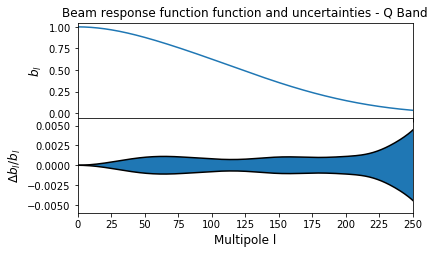

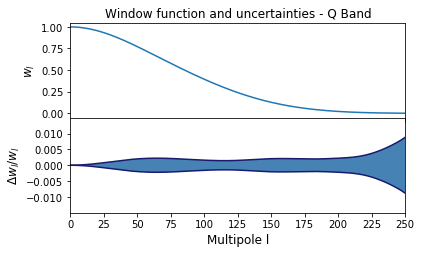

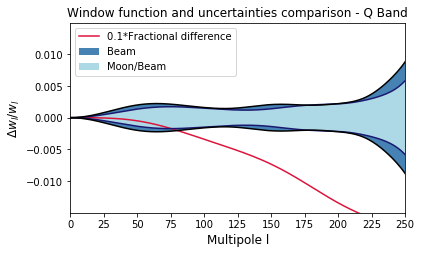

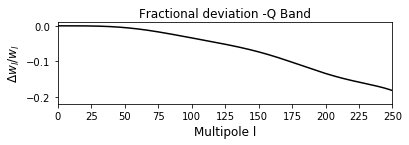

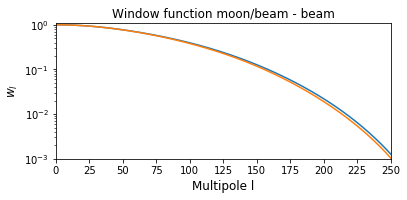

(300, 13)


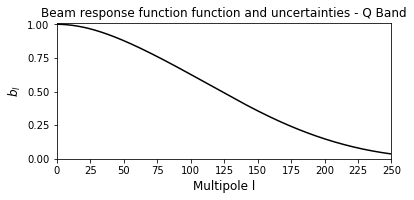

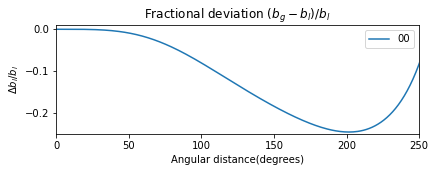

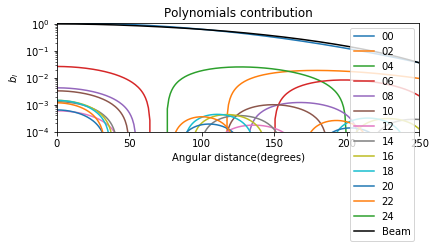

In [122]:
import numpy as np
import matplotlib.pyplot as plt


######################## Variables #############################
################################################################     
################################################################  

l   = np.loadtxt('/home/bastian/window_function/l.txt', dtype=float)
b_l = np.loadtxt('/home/bastian/window_function/b_l.txt', dtype=float)
Sigma_b_l_l_prime = np.loadtxt('/home/bastian/window_function/Sigma_b_l_l_prime.txt', dtype=float)

w_l = np.loadtxt('/home/bastian/window_function/w_l.txt', dtype=float)
Sigma_w_l_l_prime = np.loadtxt('/home/bastian/window_function/Sigma_w_l_l_prime.txt', dtype=float)


w_l_moon = np.loadtxt('/home/bastian/window_function/w_l_moon_det57.txt', dtype=float)
Sigma_w_l_l_prime_moon = np.loadtxt('/home/bastian/window_function/Sigma_w_l_l_prime_moon_det57.txt', dtype=float)

l_max = l.shape[0]
         
   
################################################################     
################################################################     
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(l, b_l, label = 'Beam response function' )
ax1.set_title('Beam response function function and uncertainties - Q Band')
ax1.set_ylabel('$b_{l}$', size= 12) 
ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax2.fill_between(l, Sigma_b_l_l_prime/b_l , -Sigma_b_l_l_prime/b_l, label ='Uncertainty' )
ax2.plot(l, Sigma_b_l_l_prime/b_l ,'k')
ax2.plot(l,-Sigma_b_l_l_prime/b_l ,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta b_{l}/b_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])
ax2.set_ylim([-0.006,0.006])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)
ax2.set_yticks(ticks = [-0.005,-0.0025,0,0.0025 ,0.005] ,minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)
plt.savefig("/home/bastian/plots/beam_response_function.pdf", bbox_inches="tight")       
plt.show()

###############################################################  
#                   Beam response function
################################################################     
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(l, w_l, label='Beam window function')
ax1.set_title('Window function and uncertainties - Q Band')
ax1.set_ylabel('$w_{l}$', size= 12) 
ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax2.fill_between(l, Sigma_w_l_l_prime/w_l, -Sigma_w_l_l_prime/w_l, facecolor='steelblue',label='Uncertainty')   #'lightcyan') #royalblue') #lightcyan
ax2.plot(l, Sigma_w_l_l_prime/w_l,'midnightblue') #'royalblue')   #'steelblue'
ax2.plot(l,-Sigma_w_l_l_prime/w_l,'midnightblue')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}/w_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])
ax2.set_ylim([-0.015,0.015])
ax2.set_yticks(ticks = [-0.01,-0.005 ,0, 0.005,0.01] ,minor=False)
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)  
plt.savefig("/home/bastian/plots/window_function.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/window_function.png", bbox_inches="tight")
plt.show()
################################################################  
#                   Window function
################################################################    
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)

ax2.set_title('Window function and uncertainties comparison - Q Band')
ax2.set_ylabel('$w_{l}$', size= 12) 

ax2.fill_between(l, Sigma_w_l_l_prime/w_l, -Sigma_w_l_l_prime/w_l, facecolor='steelblue', label='Beam') 
ax2.fill_between(l, Sigma_w_l_l_prime_moon/w_l_moon, -Sigma_w_l_l_prime_moon/w_l_moon, facecolor='lightblue', label='Moon/Beam') 

ax2.plot(l, (10**-1)*(w_l_moon-w_l)/w_l,'crimson', label='0.1*Fractional difference')

ax2.plot(l, Sigma_w_l_l_prime_moon/w_l_moon,'midnightblue')
ax2.plot(l,-Sigma_w_l_l_prime_moon/w_l_moon,'midnightblue')

ax2.plot(l, Sigma_w_l_l_prime/w_l,'k')
ax2.plot(l,-Sigma_w_l_l_prime/w_l,'k')
####
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}/w_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])
ax2.set_ylim([-0.015,0.015])
ax2.set_yticks(ticks = [-0.01,-0.005 ,0, 0.005,0.01] ,minor=False)
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)
plt.legend(loc = 2)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)  
plt.savefig("/home/bastian/plots/uncertainties_window_function.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/uncertainties_window_function.png", bbox_inches="tight")
plt.show()

################################################################  
#                   Fractional deviation
################################################################     
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)

ax2.set_title('Fractional deviation -Q Band')
ax2.set_ylabel('$w_{l}$', size= 12) 
ax2.plot(l, (w_l_moon - w_l)/w_l,'k')

ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}/w_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])
ax2.set_ylim([-0.22,0.01])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,1.5)   

plt.savefig("/home/bastian/plots/fractional_deviation.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/fractional_deviation.png", bbox_inches="tight")

plt.show()

################################################################    
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)

ax2.set_title('Window function moon/beam - beam')
ax2.set_ylabel('$w_{l}$', size= 12) 

ax2.plot(l, w_l) 
ax2.plot(l, w_l_moon) 

ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$w_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])

ax2.set_yticks(ticks = [-0.01,-0.005 ,0, 0.005,0.01] ,minor = False)
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor = False)
ax2.set_yscale('Log')
ax2.set_ylim([10**-3,1.1])
plt.legend(loc = 2)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)  
plt.savefig("/home/bastian/plots/window_function_moon_beam.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/window_function_moon_beam.png", bbox_inches="tight")
plt.show()
################################################################

N_cut = 13 #number of polynomials
B     = np.loadtxt(name, dtype=float)[0:300, 0:N_cut]
c     = np.loadtxt('parameters.txt', dtype=float)

b_ell = np.dot(B,c[:N_cut]).reshape((B.shape[0],))

norm_b = b_ell[0]
b_ell = b_ell/b_ell[0]

print B.shape


################################################################     
################################################################     
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)
ax2.set_title('Beam response function function and uncertainties - Q Band')
ax2.plot(l, b_ell ,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$b_{l}$', size= 12)      
ax2.set_xlim([0, l_max - 50])
ax2.set_ylim([0,1.01])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)
ax2.set_yticks(ticks = [0,0.25,0.5,0.75,1] ,minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/beam_response_function.pdf", bbox_inches="tight")       
plt.show()

################################################################     
################################################################ 

b_g = c[0]*B[0:300,0]/norm_b
b_g = b_g/b_g[0]


plt.clf()
plt.figure()

l0,   = plt.plot(l,(b_g - b_ell)/b_ell, label='00')
#l2,   = plt.plot(l,c[1]*B[0:300,1]/norm_b, label='02')
#l4,   = plt.plot(l,c[2]*B[0:300,2]/norm_b, label='04')
#l6,   = plt.plot(l,c[3]*B[0:300,3]/norm_b, label='06')
#l8,   = plt.plot(l,c[4]*B[0:300,4]/norm_b, label='08')
#l10,  = plt.plot(l,c[5]*B[0:300,5]/norm_b, label='10')
#l12,  = plt.plot(l,c[6]*B[0:300,6]/norm_b, label='12')
#l14,  = plt.plot(l,c[7]*B[0:300,7]/norm_b, label='14')
#l00,  = plt.plot(l, b_ell,'k', label='Beam')

plt.xlabel('Angular distance(degrees)')
plt.ylabel('$\Delta b_{l}/b_{l}$')
#plt.yscale('Log')
plt.xlim([0,250])
plt.ylim([-0.25, 0.01])
plt.title('Fractional deviation $(b_{g} - b_{l})/b_{l}$')

plt.legend(loc = 1)
f = plt.gcf()
f.set_size_inches(6.5,2.0) 
plt.savefig("/home/bastian/plots/Contributions_beam_response_comparison.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/Contributions_beam_response_comparison.png", bbox_inches="tight")
plt.show()

########################################################################

plt.clf()
plt.figure()

l0,   =  plt.plot(l,c[0]*B[0:300,0]/norm_b, label='00')
l2,   = plt.plot(l,c[1]*B[0:300,1]/norm_b, label='02')
l4,   = plt.plot(l,c[2]*B[0:300,2]/norm_b, label='04')
l6,   = plt.plot(l,c[3]*B[0:300,3]/norm_b, label='06')
l8,   = plt.plot(l,c[4]*B[0:300,4]/norm_b, label='08')
l10,  = plt.plot(l,c[5]*B[0:300,5]/norm_b, label='10')
l12,  = plt.plot(l,c[6]*B[0:300,6]/norm_b, label='12')
l14,  = plt.plot(l,c[7]*B[0:300,7]/norm_b, label='14')
l16,  = plt.plot(l,c[8]*B[0:300,8]/norm_b, label='16')
l18,  = plt.plot(l,c[9]*B[0:300,9]/norm_b, label='18')
l20,  = plt.plot(l,c[10]*B[0:300,10]/norm_b, label='20')
l22,  = plt.plot(l,c[11]*B[0:300,11]/norm_b, label='22')
l24,  = plt.plot(l,c[12]*B[0:300,12]/norm_b, label='24')

l00,  = plt.plot(l, b_ell,'k', label='Beam')

plt.xlabel('Angular distance(degrees)')
plt.ylabel('$b_{l}$')
plt.yscale('Log')
plt.xlim([0,250])
plt.ylim([10**-4, 1.1])
plt.title('Polynomials contribution')

plt.legend(loc = 1)
f = plt.gcf()
f.set_size_inches(6.5,2.0) 
plt.savefig("/home/bastian/plots/Contributions_beam_response.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/Contributions_beam_response.png", bbox_inches="tight")
plt.show()



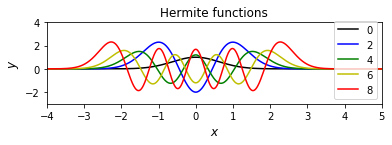

In [2]:
import numpy as np
from scipy.special import j0
from scipy.special import j1
import matplotlib.pyplot as plt
from scipy.special import hermite
from mpmath import *
from scipy.special import *
from scipy.integrate import quad
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D


x = np.linspace(-4,5,1000)          
     
####################################################

plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)

ax2.set_title('Hermite functions')

ax2.plot(x, np.exp(-(x**2)/(2*sigma**2))*(hermite(2*0)(x/sigma)),'k', label='0')
ax2.plot(x, np.exp(-(x**2)/(2*sigma**2))*(hermite(2*1)(x/sigma)),'b',label='2')
ax2.plot(x, (10**-1)*np.exp(-(x**2)/(2*sigma**2))*(hermite(2*2)(x/sigma)),'g',label='4')
ax2.plot(x, (10**-2)*np.exp(-(x**2)/(2*sigma**2))*(hermite(2*3)(x/sigma)),'y',label='6')
ax2.plot(x, (10**-3)*np.exp(-(x**2)/(2*sigma**2))*(hermite(2*4)(x/sigma)),'r',label='8')


ax2.set_xlabel('$x$', size= 12)
ax2.set_ylabel('$y$', size= 12) 


ax2.set_xlim([-4, 5])
ax2.set_ylim([-3,4])
ax2.set_xticks(ticks = [-4,-3,-2,-1,0,1,2,3,4,5] ,minor=False)

plt.legend(loc=4)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,1.5)   

plt.savefig("/home/bastian/plots/hermite.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/hermite.png", bbox_inches="tight")

plt.show()
##############






#  Contribution


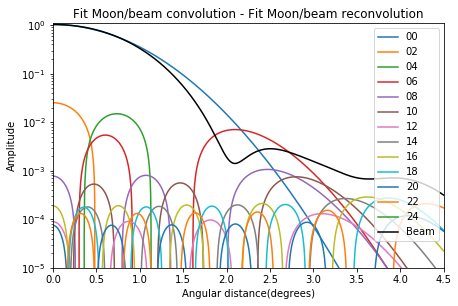

In [63]:
# Contribution of each hemrite polynomial
import numpy as np
from scipy.special import j0
from scipy.special import j1
import matplotlib.pyplot as plt
from scipy.special import hermite
from mpmath import *
from scipy.special import *
from scipy.integrate import quad
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
import pickle

########################################################################
beam_map    = pickle.load(open("beam57.p","rb"))
profile     = beam_map['Profile']
Profile_err = beam_map['Profile_err']
radius      = beam_map['r']

########################################################################
theta_r   = np.linspace(0,4.5,1000)
sigma     = 0.68560261683
########################################################################
def beam(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,c11,c12, c13, c14, c15])
    beam = 0.0
    for i in range(0, coef.shape[0]):
        beam  = beam + coef[i]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*i)(theta_array/sigma))
    return beam
########################################################################
c = np.loadtxt('parameters.txt', dtype=float)
########################################################################

plt.clf()
plt.figure()

l0,  = plt.plot(theta_r, c[0]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*0)(theta_r/sigma)), label='00')
l1,  = plt.plot(theta_r, c[1]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*1)(theta_r/sigma)), label='02')
l2,  = plt.plot(theta_r, c[2]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*2)(theta_r/sigma)), label='04')
l3,  = plt.plot(theta_r, c[3]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*3)(theta_r/sigma)), label='06')
l4,  = plt.plot(theta_r, c[4]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*4)(theta_r/sigma)), label='08')
l5,  = plt.plot(theta_r, c[5]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*5)(theta_r/sigma)), label='10')
l6,  = plt.plot(theta_r, c[6]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*6)(theta_r/sigma)), label='12')
l7,  = plt.plot(theta_r, c[7]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*7)(theta_r/sigma)), label='14')
l8,  = plt.plot(theta_r, c[8]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*8)(theta_r/sigma)), label='16')
l9,  = plt.plot(theta_r, c[9]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*9)(theta_r/sigma)), label='18')
l10, = plt.plot(theta_r, c[10]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*10)(theta_r/sigma)), label='20')
l11, = plt.plot(theta_r, c[11]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*11)(theta_r/sigma)), label='22')
l12, = plt.plot(theta_r, c[12]*np.exp(-(theta_r**2)/(2*sigma**2))*(hermite(2*12)(theta_r/sigma)), label='24')

l00, = plt.plot(theta_r, beam(theta_r,sigma,*c),'k', label='Beam')

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
plt.yscale('Log')
plt.xlim([0,4.5])
plt.ylim([10**-5, 1.1])
plt.title('Fit Moon/beam convolution - Fit Moon/beam reconvolution')

plt.legend(loc = 1)
f = plt.gcf()
f.set_size_inches(7.0,4.5) 
plt.savefig("/home/bastian/plots/Contributions.pdf", bbox_inches="tight")
plt.savefig("/home/bastian/plots/Contributions.png", bbox_inches="tight")
plt.show()

########################################################################

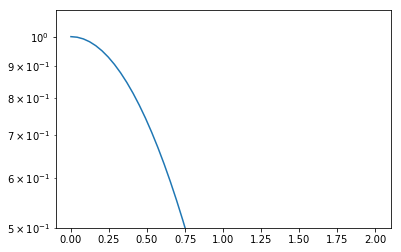

In [8]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(0,2,50)

plt.figure()
plt.plot(x,np.exp(-0.5*((sigma)**-2)*x**2))
plt.yscale('Log')
plt.ylim([5*10**-1,1.1])
plt.show()



In [39]:
import numpy as np

x = np.linspace(-6,6,600)
y = np.linspace(-6,6,600)

X,Y = np.meshgrid(x,y)


print X.shape
print X[299:301,299:301]


################################
################################
t = (0.5*(0.90447609 + 0.90449743))**-1
print 'T_beam/T_g'
print t
################################
################################



(600, 600)
[[-0.01001669  0.01001669]
 [-0.01001669  0.01001669]]
T_beam/T_g
1.10559937881


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.ma as ma
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata
import glob

######################################################################
######################################################################
#folder = glob.glob("/data/users/zxu/share/moon/scans/temp/*")
                  
# Folders organized by month
matching_08 = [s for s in folder if "/data/users/zxu/share/moon/scans/temp/scan2017-08" in s]


##################################################################
profile = 0.0
n       = 0.0

for i in range(0,len(matching_08)):
    name     = matching_08[i]+'/data/Det57.p'
    
    matching_08_new = matching_08[i].split('/')
    print matching_08_new[len(matching_08_new)-1] 

    radial_brightness = '/home/bastian/radial_profiles/Det57/'+'radial_brightness_08' + matching_08_new[len(matching_08_new)-1] +'.txt'
   
    profile   = profile + np.loadtxt(radial_brightness, dtype=float)
    n         = n + 1
    
#################################################################
r_name       = '/home/bastian/radial_profiles/Det57/'+'radial_coordinate_08' + matching_08_new[len(matching_08_new)-1] +'.txt'
r            = np.loadtxt(r_name, dtype=float)
profile      = profile/n   

name_profile = '/home/bastian/radial_profiles/Det57/'+'ave_profile_08'+'.txt'
name_radial = '/home/bastian/radial_profiles/Det57/'+'radius_08'+'.txt'
    
np.savetxt(name_profile, profile, fmt='%s') 
np.savetxt(name_radial, r, fmt='%s') 

#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile)

plt.title('Profile57_august',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('brightness',fontsize=15)
plt.xlim([0,10])
plt.yscale('Log')

f = plt.gcf()
f.set_size_inches(4.0,5.7)

plt.show()
#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile)

plt.title('Profile57_august',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
plt.ylim([10**-4, 1.3])

f = plt.gcf()
f.set_size_inches(5.0,6.8)

plt.show()
#################################################################

scan2017-08-07-23-49


IOError: [Errno 2] No such file or directory: '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-07-23-49.txt'

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.ma as ma
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata
import glob




######################################################################
######################################################################
folder = glob.glob("/data/users/zxu/share/moon/scans/temp/*")
                  
# Folders organized by month
matching_02 = [s for s in folder if "/data/users/zxu/share/moon/scans/temp/scan2017-02" in s]


##################################################################
profile = 0.0
n       = 0.0

for i in range(0, len(matching_02)):
    name            = matching_02[i]+'/data/Det57.p'
    matching_02_new = matching_02[i].split('/')
    print matching_02_new[len(matching_02_new)-1] 

    radial_brightness = '/home/bastian/radial_profiles/Det57/'+'radial_brightness_02' + matching_02_new[len(matching_02_new)-1] +'.txt'
   
    profile           = profile + np.loadtxt(radial_brightness, dtype=float)
    n                 = n + 1
    
#################################################################
r_name       = '/home/bastian/radial_profiles/Det57/'+'radial_coordinate_02' + matching_02_new[len(matching_02_new)-1] +'.txt'
r            = np.loadtxt(r_name, dtype=float)
  
radial_brightness_04 = '/home/bastian/radial_profiles/Det57/'+'radial_brightness_02' + matching_02_new[3] +'.txt'

profile      = (profile - np.loadtxt(radial_brightness_04, dtype=float))/(n-1)

name_profile = '/home/bastian/radial_profiles/Det57/'+'ave_profile_02'+'.txt'
name_radial = '/home/bastian/radial_profiles/Det57/'+'radius_02'+'.txt'
    
np.savetxt(name_profile, profile, fmt='%s') 
np.savetxt(name_radial, r, fmt='%s') 

#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile)

plt.title('Profile57_august',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('brightness',fontsize=15)
plt.xlim([0,10])
plt.yscale('Log')

f = plt.gcf()
f.set_size_inches(4.0,5.7)

plt.show()
#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile)

plt.title('Profile57_august',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
plt.ylim([10**-4, 1.3])

f = plt.gcf()
f.set_size_inches(5.0,6.8)

plt.show()
#################################################################

scan2017-02-17-05-28
scan2017-02-17-11-38
scan2017-02-15-09-50
scan2017-02-26-12-37
scan2017-02-13-03-01
scan2017-02-18-07-15
scan2017-02-13-07-37
scan2017-02-18-11-17
scan2017-02-15-04-13
scan2017-02-18-13-26
scan2017-02-14-08-49
scan2017-02-14-03-37
scan2017-02-23-12-47
scan2017-02-18-05-10
scan2017-02-16-04-50
scan2017-02-16-10-45


IOError: [Errno 2] No such file or directory: '/home/bastian/radial_profiles/Det57/radial_brightness_02zxu.txt'

In [75]:
#matching_08 = [s for s in folder if "/data/users/zxu/share/moon/scans/temp/scan2017-08" in s]

matching_02 = [s for s in folder if "/home/bastian/radial_profiles/Det57/radial_coordinate_08scan2017" in s]
print matching_02



[]


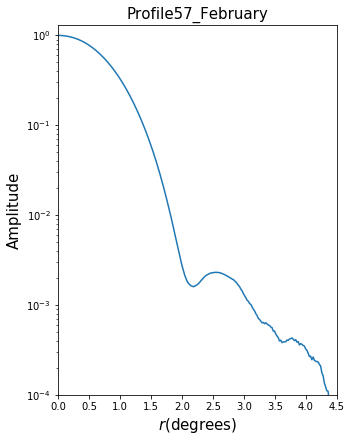

In [133]:
radial_brightness_01 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-13-03-01.txt'
radial_brightness_02 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-13-07-37.txt'
radial_brightness_03 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-14-03-37.txt'#
radial_brightness_04 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-14-08-49.txt'
radial_brightness_05 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-15-04-13.txt'
radial_brightness_06 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-15-09-50.txt'
radial_brightness_07 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-16-04-50.txt'
radial_brightness_08 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-16-10-45.txt'
radial_brightness_09 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-17-05-28.txt'
radial_brightness_10 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-17-11-38.txt'
radial_brightness_11 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-05-10.txt'
radial_brightness_12 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-07-15.txt'
radial_brightness_13 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-11-17.txt'
radial_brightness_14 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-13-26.txt'
radial_brightness_15 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-23-12-47.txt'#
radial_brightness_16 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-26-12-37.txt'



#
#scan2017-02-26-12-37

profile_01           = np.loadtxt(radial_brightness_01, dtype=float)
profile_02           = np.loadtxt(radial_brightness_02, dtype=float)
profile_03           = np.loadtxt(radial_brightness_03, dtype=float)
profile_04           = np.loadtxt(radial_brightness_04, dtype=float)
profile_05           = np.loadtxt(radial_brightness_05, dtype=float)
profile_06           = np.loadtxt(radial_brightness_06, dtype=float)
profile_07           = np.loadtxt(radial_brightness_07, dtype=float)
profile_08           = np.loadtxt(radial_brightness_08, dtype=float)
profile_09           = np.loadtxt(radial_brightness_09, dtype=float)
profile_10           = np.loadtxt(radial_brightness_10, dtype=float)
profile_11           = np.loadtxt(radial_brightness_11, dtype=float)
profile_12           = np.loadtxt(radial_brightness_12, dtype=float)
profile_13           = np.loadtxt(radial_brightness_13, dtype=float)
profile_14           = np.loadtxt(radial_brightness_14, dtype=float)
profile_15           = np.loadtxt(radial_brightness_15, dtype=float)
profile_16           = np.loadtxt(radial_brightness_16, dtype=float)
   
r                    = np.loadtxt('/home/bastian/radial_profiles/Det57/radial_coordinate_02scan2017-02-18-05-10.txt', dtype=float)


# Ave_profile


profile       = profile_01 + profile_02 + profile_03  + profile_05 + profile_06 + profile_07 + profile_08 + profile_09 + profile_10 +profile_11 + profile_12 + profile_13 + profile_14 



# profile_16
# profile_15
# profile_04

#profile      =   profile_03     
#profile      =   profile_09 
    
profile  = profile/13


name_profile = '/home/bastian/radial_profiles/Det57/'+'ave_profile_02'+'.txt'
name_radial  = '/home/bastian/radial_profiles/Det57/'+'radius_02'+'.txt'
    
    
np.savetxt(name_profile, profile, fmt='%s') 
np.savetxt(name_radial, r, fmt='%s') 



#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile/profile[1])

plt.title('Profile57_February',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
plt.ylim([10**-4, 1.3])

f = plt.gcf()
f.set_size_inches(5.0,6.8)

plt.show()
#################################################################





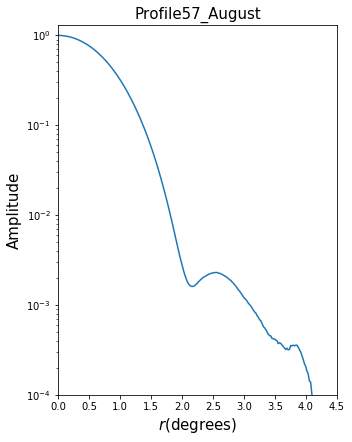

In [135]:
radial_brightness_01 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-13-03-01.txt'
radial_brightness_02 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-13-07-37.txt'
radial_brightness_03 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-14-03-37.txt'#
radial_brightness_04 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-14-08-49.txt'
radial_brightness_05 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-15-04-13.txt'
radial_brightness_06 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-15-09-50.txt'
radial_brightness_07 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-16-04-50.txt'
radial_brightness_08 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-16-10-45.txt'
radial_brightness_09 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-17-05-28.txt'
radial_brightness_10 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-17-11-38.txt'
radial_brightness_11 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-05-10.txt'
radial_brightness_12 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-07-15.txt'
radial_brightness_13 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-11-17.txt'
radial_brightness_14 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-18-13-26.txt'
radial_brightness_15 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-23-12-47.txt'#
radial_brightness_16 = '/home/bastian/radial_profiles/Det57/radial_brightness_02scan2017-02-26-12-37.txt'



radial_brightness_01 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-01-01-34.txt'
radial_brightness_02 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-01-19-58.txt'
radial_brightness_03 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-02-02-23.txt'
radial_brightness_04 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-02-20-41.txt'
radial_brightness_05 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-03-03-12.txt'
radial_brightness_06 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-03-20-28.txt'
radial_brightness_07 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-03-22-34.txt'
radial_brightness_08 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-04-02-54.txt'
radial_brightness_09 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-04-04-58.txt'
radial_brightness_10 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-05-23-05.txt'
radial_brightness_11 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-06-05-37.txt'
radial_brightness_12 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-06-22-57.txt'
radial_brightness_13 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-07-01-02.txt'
radial_brightness_14 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-07-05-16.txt'
radial_brightness_15 = '/home/bastian/radial_profiles/Det57/radial_brightness_08scan2017-08-07-07-21.txt'

#
#scan2017-02-26-12-37

profile_01           = np.loadtxt(radial_brightness_01, dtype=float)
profile_02           = np.loadtxt(radial_brightness_02, dtype=float)
profile_03           = np.loadtxt(radial_brightness_03, dtype=float)
profile_04           = np.loadtxt(radial_brightness_04, dtype=float)
profile_05           = np.loadtxt(radial_brightness_05, dtype=float)
profile_06           = np.loadtxt(radial_brightness_06, dtype=float)
profile_07           = np.loadtxt(radial_brightness_07, dtype=float)
profile_08           = np.loadtxt(radial_brightness_08, dtype=float)
profile_09           = np.loadtxt(radial_brightness_09, dtype=float)
profile_10           = np.loadtxt(radial_brightness_10, dtype=float)
profile_11           = np.loadtxt(radial_brightness_11, dtype=float)
profile_12           = np.loadtxt(radial_brightness_12, dtype=float)
profile_13           = np.loadtxt(radial_brightness_13, dtype=float)
profile_14           = np.loadtxt(radial_brightness_14, dtype=float)
profile_15           = np.loadtxt(radial_brightness_15, dtype=float)

   
r                    = np.loadtxt('/home/bastian/radial_profiles/Det57/radial_coordinate_08scan2017-08-01-01-34.txt', dtype=float)




# Ave_profile


profile       = profile_01 + profile_02 + profile_03 + profile_04  + profile_05 + profile_06 + profile_07 + profile_08 + profile_09 + profile_10 +profile_11 + profile_12 + profile_13 + profile_14+ profile_15 



# profile_16
# profile_15
# profile_04

#profile      =   profile_03     
#profile      =   profile_09 
    
profile  = profile/15


name_profile = '/home/bastian/radial_profiles/Det57/'+'ave_profile_08'+'.txt'
name_radial  = '/home/bastian/radial_profiles/Det57/'+'radius_08'+'.txt'
    
    
np.savetxt(name_profile, profile, fmt='%s') 
np.savetxt(name_radial, r, fmt='%s') 



#################################################################
plt.clf()
figure = plt.figure()
ave_profile = plt.plot(r, profile/profile[1])

plt.title('Profile57_August',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
plt.ylim([10**-4, 1.3])

f = plt.gcf()
f.set_size_inches(5.0,6.8)

plt.show()
#################################################################

plt.clf()
plt.figure()

l3, = plt.plot(theta_r, t,'g', label = 'Fit Moon*beam')
l4, = plt.plot(rad[:297],ave_rings[:297]/ave_rings[1],'--b',label='Moonreconvolution')

plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
plt.yscale('Log')
plt.xlim([0,5])
plt.ylim([10**-4, 1.1])
plt.title('Fit Moon/beam convolution - Fit Moon/beam reconvolution')

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,3.5) 
#plt.savefig("/home/bastian/plots/Moon_beam_convolution_moon_beam_reconvolution.pdf", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/Moon_beam_convolution_moon_beam_reconvolution.png", bbox_inches="tight")
plt.show()




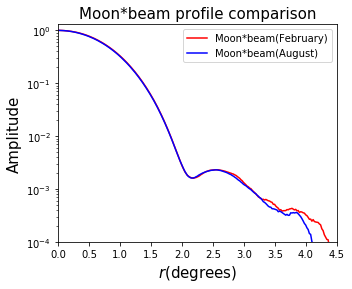

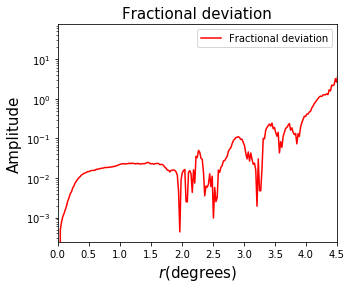

In [5]:

r   = np.loadtxt('/home/bastian/radial_profiles/Det57/radial_coordinate_08scan2017-08-01-01-34.txt', dtype=float)


name_profile_02 = '/home/bastian/radial_profiles/Det57/'+'ave_profile_02'+'.txt'
name_profile_08 = '/home/bastian/radial_profiles/Det57/'+'ave_profile_08'+'.txt'

profile_02  = np.loadtxt(name_profile_02, dtype=float)
profile_08  = np.loadtxt(name_profile_08, dtype=float)


#################################################################
plt.clf()
figure = plt.figure()

ave_profile_02 = plt.plot(r, profile_02/profile_02[1],'r' , label = 'Moon*beam(February)')
ave_profile_08 = plt.plot(r, profile_08/profile_08[1],'b' , label = 'Moon*beam(August)' )

plt.title('Moon*beam profile comparison',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
plt.ylim([10**-4, 1.3])

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,4.0)

plt.show()


#################################################################


plt.clf()
figure = plt.figure()

ave_profile_02 = plt.plot(r, np.abs(-profile_02/profile_02[1]+profile_08/profile_08[1])/(profile_02/profile_02[1]),'r' ,
                          label = 'Fractional deviation')

plt.title('Fractional deviation',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlim([0,4.5])
plt.yscale('Log')
#plt.ylim([10**-4, 1.3])

plt.legend()
f = plt.gcf()
f.set_size_inches(5.0,4.0)

plt.show()
#################################################################





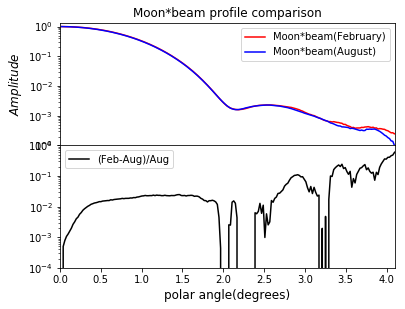

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.ma as ma
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata
import glob


################################################################  
r   = np.loadtxt('/home/bastian/radial_profiles/Det57/radial_coordinate_08scan2017-08-01-01-34.txt', dtype=float)

name_profile_02 = '/home/bastian/radial_profiles/Det57/'+'ave_profile_02'+'.txt'
name_profile_08 = '/home/bastian/radial_profiles/Det57/'+'ave_profile_08'+'.txt'

profile_02      = np.loadtxt(name_profile_02, dtype=float)
profile_08      = np.loadtxt(name_profile_08, dtype=float)

################################################################     
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(r, profile_02/profile_02[1],'r', label = 'Moon*beam(February)')
ax1.plot(r, profile_08/profile_08[1],'b', label = 'Moon*beam(August)' )

ax1.set_title('Moon*beam profile comparison')
ax1.set_ylabel('$Amplitude$', size= 12) 
#ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax1.set_xlim([0,4.1])
ax1.set_yscale('Log')
ax1.set_ylim([10**-4, 1.3])
ax1.legend()


ax2.plot(r,(-1.0)*((profile_08/profile_08[1]-profile_02/profile_02[1]))/(profile_02/profile_02[1]),'k', label = '(Feb-Aug)/Aug' )


ax2.set_xlabel('polar angle(degrees)', size= 12)
#ax2.set_ylabel('$Amplitude$', size= 12) 

ax2.set_yscale('Log')
ax2.set_ylim([10**-4, 10**0.0])

#ax2.set_xlim([0, l_max - 50])
#ax2.set_ylim([-0.006,0.006])
#ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250] ,minor=False)
#ax2.set_yticks(ticks = [-0.005,-0.0025,0,0.0025 ,0.005] ,minor=False)


ax2.legend()
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,4.5)
plt.savefig("/home/bastian/plots/f_error_02_08.png", bbox_inches="tight")       
plt.show()


# Results 'the beam shape '.


beam_profile = [1.00000000e+00 9.88931766e-01 9.58929650e-01 9.17310526e-01
 8.70496796e-01 8.20283405e-01 7.64137230e-01 6.98874235e-01
 6.24460117e-01 5.44967758e-01 4.66349966e-01 3.93207539e-01
 3.27119227e-01 2.67393249e-01 2.13060420e-01 1.64264575e-01
 1.22151518e-01 8.77770750e-02 6.11870706e-02 4.13629142e-02
 2.68464500e-02 1.63895706e-02 9.17224585e-03 4.62537712e-03
 2.18369171e-03 1.21338760e-03 1.10990493e-03 1.41545580e-03
 1.84804578e-03 2.25283790e-03 2.54603111e-03 2.69146627e-03
 2.69631080e-03 2.59765541e-03 2.43671450e-03 2.24009820e-03
 2.02173270e-03 1.79674156e-03 1.58801892e-03 1.41746691e-03
 1.29202241e-03 1.19992122e-03 1.12151214e-03 1.04456123e-03
 9.70637372e-04 9.08461902e-04 8.61821518e-04 8.23159555e-04
 7.77650768e-04 7.13388060e-04 6.29189365e-04 5.34687255e-04
 4.43850445e-04 3.67350565e-04 3.08691065e-04 2.65330349e-04
 2.32563315e-04 2.06948519e-04 1.87462314e-04 1.74637769e-04
 1.69108670e-04 1.70779333e-04 1.78897298e-04 1.92523792e-04
 2.107629

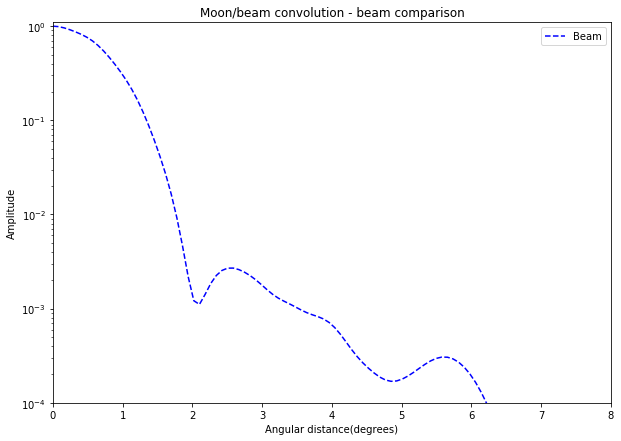

solid_angle 0.000786999051499


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.special import *
import scipy.integrate as integrate


def beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0

    
    
sigma   = 0.664892697897  
theta_r = np.linspace(0,8.0,100, dtype = float)  

parameters = np.array([5.712069138146368,-0.12782882283839309, -0.1133755552677956, 0.02510155710487992, 0.022559478865768267,
 0.0012975021692387078, 0.010523464852567391, -0.005922938641026898, 0.014013457125641365, -0.010864759919086324,
0.01670961159024953, -0.015698989364766987, 0.0179807610593161, -0.016737954594359082, 0.01630773247230558,
-0.012949628688288618, 0.011756802577539633, -0.00744462257976448, 0.006582177247027778, -0.002883745250946521,
0.0029488921098978762, -0.0007224353658529073, 0.0007527346555991603])


beam_profile = beam22(theta_r, sigma,*parameters)
print "beam_profile =", beam_profile


plt.clf()
plt.figure()
l2, = plt.plot(theta_r, beam22(theta_r,sigma,*parameters),'--b', label='Beam')
plt.xlabel('Angular distance(degrees)')
plt.ylabel('Amplitude')
plt.yscale('Log')
plt.xlim([0, theta_r[theta_r.shape[0]-1]])
plt.ylim([10**-5, 1.1])
plt.title('Moon/beam convolution - beam comparison')

plt.legend()
f = plt.gcf()
f.set_size_inches(10.0,7.0) 
plt.show()



sigma_rad  = (2*np.pi/360.0)*sigma 
OMEGA = integrate.quad(lambda theta:2*np.pi*np.sin(theta)*beam22(theta,sigma_rad,*parameters)\
                           ,0.0, np.pi, epsabs = 10**-8)[0]


print "solid_angle", OMEGA



In [29]:
import numpy as np
from scipy.special import j0
from scipy.special import j1
import matplotlib.pyplot as plt
from scipy.special import hermite
from mpmath import *
from scipy.special import *
from scipy.integrate import quad
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
import pickle


profile = np.array([1])

profile

array([1])

In [86]:
I = range(0, 5 + 1)
print I 

[0, 1, 2, 3, 4, 5]


In [156]:
def norm_beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0


4


In [ ]:
# John Appel 
T = moon_gaussian_convolution/moon_beam_convolution

t = T[299:301,299:301]

print t

rad_beam , ave_rings_beam, Number_beam = av_circle(x,y,moon_beam_convolution)
rad_g, ave_rings_g, Number_g = av_circle(x,y,moon_gaussian_convolution)

#total_pixel = np.sum(Number)
print rad
print ave_rings

print rad.shape
print ave_rings.shape
################################################################
np.savetxt('moon_beam_convolution_profile_det57.txt', ave_rings_beam, fmt='%s') 
np.savetxt('moon_beam_convolution_radius.txt', rad_beam, fmt='%s')  
ave_rings_beam = np.loadtxt('moon_beam_convolution_profile_det57.txt', dtype=float)
rad_beam       = np.loadtxt('moon_beam_convolution_radius.txt', dtype=float)

np.savetxt('moon_gaussian_convolution_profile_det57.txt', ave_rings_g, fmt='%s') 
np.savetxt('moon_gaussian_convolution_radius.txt', rad_g, fmt='%s')  
ave_rings_g = np.loadtxt('moon__gaussian_convolution_profile_det57.txt', dtype=float)
rad_g      = np.loadtxt('moon_gaussian_convolution_radius.txt', dtype=float)
#################################################################
plt.clf()
plt.figure()
plt.plot(rad[:297],ave_rings[:297]/ave_rings[1])
plt.title('Averaged_moon_convolution',fontsize=15)
plt.xlabel('$r$(degrees)',fontsize=15)
plt.ylabel('brightness',fontsize=15)
plt.xlim([0,6])
plt.yscale('Log')

f = plt.gcf()
f.set_size_inches(4.0,5.7)

plt.show()
#################################################################
    


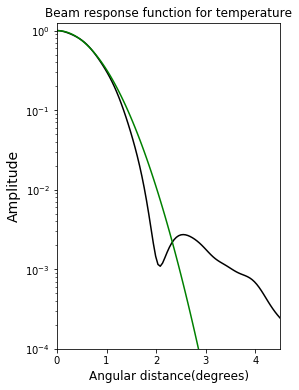

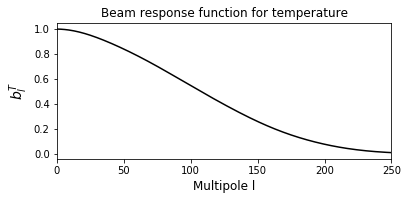

[1.]
FWHM_hf = 1.55290604304 (degrees)
FWHM_ga = 1.56570265278 (degrees)
Solid_angle_beam = 7.928E-04 +/-  7.601E-07 (str)


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate
from scipy.special import lpmv
from scipy.integrate import quad
from scipy.special import *
from scipy import optimize
from decimal import Decimal
################################################################
def BEAM_normalization(sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam_0 = 0.0
    # sigma linear scale transformation from deg -- > rad.
    sigma = (2*np.pi/360.0)*sigma  
    for n in range(0, coef.shape[0]):
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5)) 
    return beam_0 
################################################################
def beam22(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0
################################################################
# Normalized beam
def BEAM(theta,sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22])
    beam   = 0.0
    sigma  = (2*np.pi/360.0)*sigma  
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta**2)/(2*sigma**2))*(hermite(2*n)(theta/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
#############################################################
# Beam component of hermite expansion
def BEAM_2i(theta,sigma,n):
    # parameters(theta,sigma, n)
    sigma    = (2*np.pi/360.0)*sigma 
    beam_2i  = np.exp(-(theta**2)/(2*sigma**2))*(hermite(2*n)(theta/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam_2i
#############################################################
#Integrand
def integrand(theta,sigma,l,i): 
    #parameter(angle,sigma,ell, 2i-hermite, standard deviation)
    return (2*np.pi)*np.sin(theta)*BEAM_2i(theta,sigma,i)*(legendre(l)(np.cos(theta)))
#############################################################
def basis_trans(sigma,l,i): 
    #notice that we are transformorming the basis only until 0.2/pi(rad), one order of magnitud above.
    # which is good 4.5/180 almost 2 order of magnitud(degres)
    B_l_i = quad(integrand,0.0,np.pi, args = (sigma,l,i), epsabs = 10**-8)[0]
    return B_l_i
#############################################################

theta_max      = 0.08  #rad
theta          = np.linspace(0, theta_max, 100, dtype = float)

l_max          = 250
Number_hermite = 23
i_max          = Number_hermite - 1

###############################################################
sigma     = np.loadtxt('sigma.txt', dtype = float, ndmin = 1)
coef      = np.loadtxt('coef_22.txt', dtype = float)
cov       = np.loadtxt('cov_22.txt', dtype = float)
beam_0    = BEAM_normalization(sigma, *coef)

#print coef
#print 'B_0', beam_0

norm_coef = coef/beam_0
norm_cov  = cov/((beam_0)**2)
     
np.savetxt('normalized_parameters_focal_plane.txt', norm_coef, fmt='%s')
np.savetxt('normalized_covariance_focal_plane.txt', norm_cov, fmt='%s')
    
norm_coef = np.loadtxt('normalized_parameters_focal_plane.txt', dtype = float)
norm_cov  = np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)


def FWHM_hf(theta):
    return BEAM(theta, sigma, *norm_coef)-0.5

def FWHM_ga(theta):
    return np.exp(-0.5*(theta/(sigma*(np.pi/180.0)))**2)-0.5
    
minimum_hf = optimize.brentq(FWHM_hf, 0, 0.2)
minimum_ga = optimize.brentq(FWHM_ga, 0, 0.2)

#print'FWHM','=' ,2*minimum*180/np.pi, '(degrees)'


plt.close('all')        
f, (ax1) = plt.subplots(1, sharex = True)
ax1.set_title('Beam response function for temperature')
ax1.plot(theta*180/np.pi, BEAM(theta, sigma, *norm_coef),'k')
ax1.plot(theta*180/np.pi, np.exp(-0.5*(theta/(sigma*(np.pi/180.0)))**2),'g')
ax1.set_xlabel('Angular distance(degrees)', size= 12)
ax1.set_ylabel('Amplitude', size = 14.0)     
ax1.set_xlim([0, 4.5])
ax1.set_ylim([10**(-4), 10**(0.1)])
#ax1.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
#ax1.set_yticks(ticks = [0,0.25,0.5,0.75,1], minor = False)
ax1.set_yscale('Log')
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  
f = plt.gcf()
f.set_size_inches(4.0,6)

#name_fig_bell_pol = "/home/bastian/plots/beam_response_function_T%s.pdf"   % str(l_max)
#plt.savefig(name_fig_bell_pol, bbox_inches = "tight")   

plt.show()
# the integration is between 0 to pi.

#############################################################
################ Solid angle computations ###################
#############################################################

e_scaling = 1.0
OMEGA     = np.zeros(norm_coef.shape[0] + 1, dtype = float)
#Fill the first element with the average of the solid Beam solid angle
OMEGA[0]  = integrate.quad(lambda theta: (e_scaling)*2*np.pi*np.sin(theta)*BEAM(theta,sigma,*norm_coef)\
                           ,0.0, np.pi, epsabs = 10**-8)[0]

# I have to figure out how normalize the coefficient before compute ----> modify some functions.
# we have to modify the scalar functions BEAM in function to receive just a parameter.

for n in range(1, OMEGA.shape[0]):
    OMEGA[n] = integrate.quad(lambda theta: (e_scaling)*2*np.pi*np.sin(theta)*BEAM_2i(theta,sigma,n-1)\
                              ,0.0, np.pi, epsabs = 10**-8)[0]
    
np.savetxt('OMEGA.txt', OMEGA, fmt ='%s')    
OMEGA    =  OMEGA/(e_scaling)

#print 'Omega'
#print OMEGA

suma     = 0.0
for n in range(0, norm_coef.shape[0]):   
    suma = suma + norm_coef[n]*OMEGA[n + 1]
   
#print OMEGA[0]  
#print suma  

beam_0    = BEAM_normalization(sigma,*norm_coef)
#############################################################
############          Solid angle                ############ 
#############################################################
#print 'OMEGA shape', OMEGA.shape
#print 'norm_cov shape', norm_cov.shape
#print OMEGA[1:]

OMEGA_t  = OMEGA[1:].reshape((1, OMEGA[1:].shape[0]))   
OMEGA_v  = OMEGA[1:].reshape((OMEGA[1:].shape[0],1))

Sigma_Omega_2 = np.dot(OMEGA_t, np.dot(norm_cov, OMEGA_v))[0][0]

#print 'Sigma_Omega_2', Sigma_Omega_2
#print 'Sigma_Omega', (Sigma_Omega_2)**0.5
#print ' Solid_angle_beam =', str(  Decimal(OMEGA[0])  ), '+/- ', str((Sigma_Omega_2)**0.5)      
#print 'OMEGA', OMEGA[0]-(Sigma_Omega_2)**0.5, OMEGA[0] + (Sigma_Omega_2)**0.5

name_T = 'B_ell_T_i%s.txt' % str(l_max)
#############################################################
##########  Harmonic transformation
#############################################################
# The harmonic transform of the i-th component.
#BT  = np.zeros([l_max + 1, i_max + 1], dtype = float)
#for l in range(0, l_max + 1):      
#    for i in range(0, i_max + 1):
#        BT[l,i] = basis_trans(sigma,l,i)
#np.savetxt(name_T, BT, fmt='%s')
#############################################################
BT      = np.loadtxt(name_T, dtype = float)[0:l_max + 1, 0:i_max + 1]
B_ell_T = np.dot(BT, norm_coef[:i_max + 1])
B_ell_T = B_ell_T.reshape((BT.shape[0],1))
b_ell_T = B_ell_T/OMEGA[0]

#print b_ell_T

# Save_beam 
np.savetxt('b_ell_T.txt', b_ell_T, fmt='%s')

#############################################################
#############################################################
#############################################################
l = np.arange(0, l_max + 1, 1) 
f, (ax1) = plt.subplots(1, sharex=True)
ax1.set_title('Beam response function for temperature')
ax1.plot(l, b_ell_T,'k')
ax1.set_xlabel('Multipole l', size= 12)
ax1.set_ylabel('$b_{l}^{T}$', size =14.0)     
ax1.set_xlim([0, l_max])
#ax1.set_yscale('Log')
#ax1.set_ylim([10**-12,1.02])
#ax1.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
#ax1.set_yticks(ticks = [0,0.25,0.5,0.75,1], minor = False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  
f = plt.gcf()
f.set_size_inches(6.0,2.5)

#name_fig_bell_pol = "/home/bastian/plots/beam_response_function_T%s.pdf"   % str(l_max)
#plt.savefig(name_fig_bell_pol, bbox_inches = "tight")   

plt.show()

print b_ell_T[0]

print'FWHM_hf','=' ,2*minimum_hf*180/np.pi, '(degrees)'
print'FWHM_ga','=' ,2*minimum_ga*180/np.pi, '(degrees)'
print'Solid_angle_beam =', str( '%.3E' % Decimal(OMEGA[0]) ), '+/- ',str('%.3E' % Decimal((Sigma_Omega_2)**0.5) ),'(str)'